In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cycler, math
from matplotlib import cm



from datetime import datetime, timedelta
%matplotlib inline
%config InlineBackend.figure_format='retina'

### Load aggregated data

In [7]:
#LINKUSDT #DASHUSDT #THETAUSDT #BNBUSDT
#symbols = ['ADAUSDT', 'BTCUSDT', 'BNBUSDT', 'DASHUSDT', 'ETHUSDT', 'LINKUSDT', 'LTCUSDT', 'NANOUSDT', 'THETAUSDT', 'XRPUSDT']
symbols = ['ADAUSDT', 'BTCUSDT', 'ETHUSDT', 'LTCUSDT', 'NANOUSDT', 'XRPUSDT']
symbs, dfs = [], []

for symbol in symbols:
    print(symbol[:-4], end=' ')
    symbs.append(symbol[:-4])
    df = pd.read_parquet('data.nosync/_aggreg/'+symbol+'.pq')
    print(df.shape, end=' - ')
    dfs.append(df)

ADA (3945102, 6) - BTC (6536042, 6) - ETH (6473357, 6) - LTC (5044320, 6) - NANO (575820, 6) - XRP (4813842, 6) - 

In [8]:
dfs[0].tail()

is_buyer_maker  nb_trade  min_price  max_price  \
timestamp                                                             
2021-01-09 23:59:00            True        37    0.33038    0.33081   
2021-01-09 23:59:30           False        48    0.32995    0.33069   
2021-01-09 23:59:30            True        59    0.32983    0.33055   
2021-01-10 00:00:00           False        54    0.32992    0.33075   
2021-01-10 00:00:00            True        29    0.32987    0.33065   

                     mid_price  volume_tot  
timestamp                                   
2021-01-09 23:59:00   0.330668    127522.4  
2021-01-09 23:59:30   0.330172    292502.7  
2021-01-09 23:59:30   0.330172    166762.6  
2021-01-10 00:00:00   0.330310    146717.7  
2021-01-10 00:00:00   0.330310    104695.6

`is_buyer_maker = True` $\rightarrow$ a buyer has taken the ask price $\rightarrow$ `trade_price = ask_price`
### Join data 

In [9]:
dfs_ = []
for df in dfs:
    df['mid_price'] = df['mid_price'].groupby('timestamp').mean() #group mid_price
    df['max_price'] = df['max_price'].groupby('timestamp').max() #group max_price
    df['min_price'] = df['min_price'].groupby('timestamp').min() #group min_price
    df['nb_trade'] = df['nb_trade'].groupby('timestamp').sum() #group nb_trade
    df['volume_tot'] = df['volume_tot'].groupby('timestamp').sum() #group volume_tot
    df = df.groupby(df.index).first()[['nb_trade', 'min_price', 'max_price', 'mid_price', 'volume_tot']]
    df['mid_price_return']=df.mid_price.pct_change()
    df['mid_price_log_return']=np.log(1+df.mid_price_return)
    dfs_.append(df)
dfs = dfs_

In [10]:
dfs[1].tail()

nb_trade  min_price  max_price     mid_price  volume_tot  \
timestamp                                                                       
2021-01-09 23:58:00       672   40080.72   40121.33  40110.959199   24.903269   
2021-01-09 23:58:30       600   40079.92   40119.99  40104.563712   26.593990   
2021-01-09 23:59:00       451   40070.38   40116.24  40095.203323   20.236909   
2021-01-09 23:59:30       428   40075.00   40102.47  40088.919293   24.764166   
2021-01-10 00:00:00       393   40075.01   40098.10  40088.524766   23.097396   

                     mid_price_return  mid_price_log_return  
timestamp                                                    
2021-01-09 23:58:00          0.000837              0.000836  
2021-01-09 23:58:30         -0.000159             -0.000159  
2021-01-09 23:59:00         -0.000233             -0.000233  
2021-01-09 23:59:30         -0.000157             -0.000157  
2021-01-10 00:00:00         -0.000010             -0.000010

### Group every cryptos

In [11]:
data = pd.concat(dfs, keys=symbols)
display(data.head())
display(data.tail())

nb_trade  min_price  max_price  mid_price  \
        timestamp                                                        
ADAUSDT 2018-07-25 00:00:30        57    0.17264    0.17360   0.173046   
        2018-07-25 00:01:00        51    0.17250    0.17315   0.172807   
        2018-07-25 00:01:30        54    0.17315    0.17409   0.173655   
        2018-07-25 00:02:00        34    0.17348    0.17427   0.173963   
        2018-07-25 00:02:30        21    0.17338    0.17409   0.173849   

                             volume_tot  mid_price_return  \
        timestamp                                           
ADAUSDT 2018-07-25 00:00:30    106654.5               NaN   
        2018-07-25 00:01:00    150228.9         -0.001379   
        2018-07-25 00:01:30    201772.1          0.004906   
        2018-07-25 00:02:00    229974.3          0.001775   
        2018-07-25 00:02:30     69785.5         -0.000657   

                             mid_price_log_return  
        timestamp                                  
ADAUSDT 2018-07-25 00:00:30                   NaN  
        2018-07-25 00:01:00             -0.001380  
        2018-07-25 00:01:30              0.004894  
        2018-07-25 00:02:00              0.001773  
        2018-07-25 00:02:30             -0.000658

nb_trade  min_price  max_price  mid_price  \
        timestamp                                                        
XRPUSDT 2021-01-09 23:58:00       172    0.32475    0.32561   0.325204   
        2021-01-09 23:58:30       127    0.32489    0.32552   0.325206   
        2021-01-09 23:59:00       108    0.32449    0.32516   0.324925   
        2021-01-09 23:59:30       161    0.32388    0.32488   0.324296   
        2021-01-10 00:00:00       131    0.32401    0.32493   0.324456   

                             volume_tot  mid_price_return  \
        timestamp                                           
XRPUSDT 2021-01-09 23:58:00    298415.5          0.001354   
        2021-01-09 23:58:30    344229.1          0.000006   
        2021-01-09 23:59:00    175554.3         -0.000866   
        2021-01-09 23:59:30    297306.0         -0.001933   
        2021-01-10 00:00:00    342590.5          0.000492   

                             mid_price_log_return  
        timestamp                                  
XRPUSDT 2021-01-09 23:58:00              0.001353  
        2021-01-09 23:58:30              0.000006  
        2021-01-09 23:59:00             -0.000867  
        2021-01-09 23:59:30             -0.001935  
        2021-01-10 00:00:00              0.000492

### General plot of 30 seconds returns / price

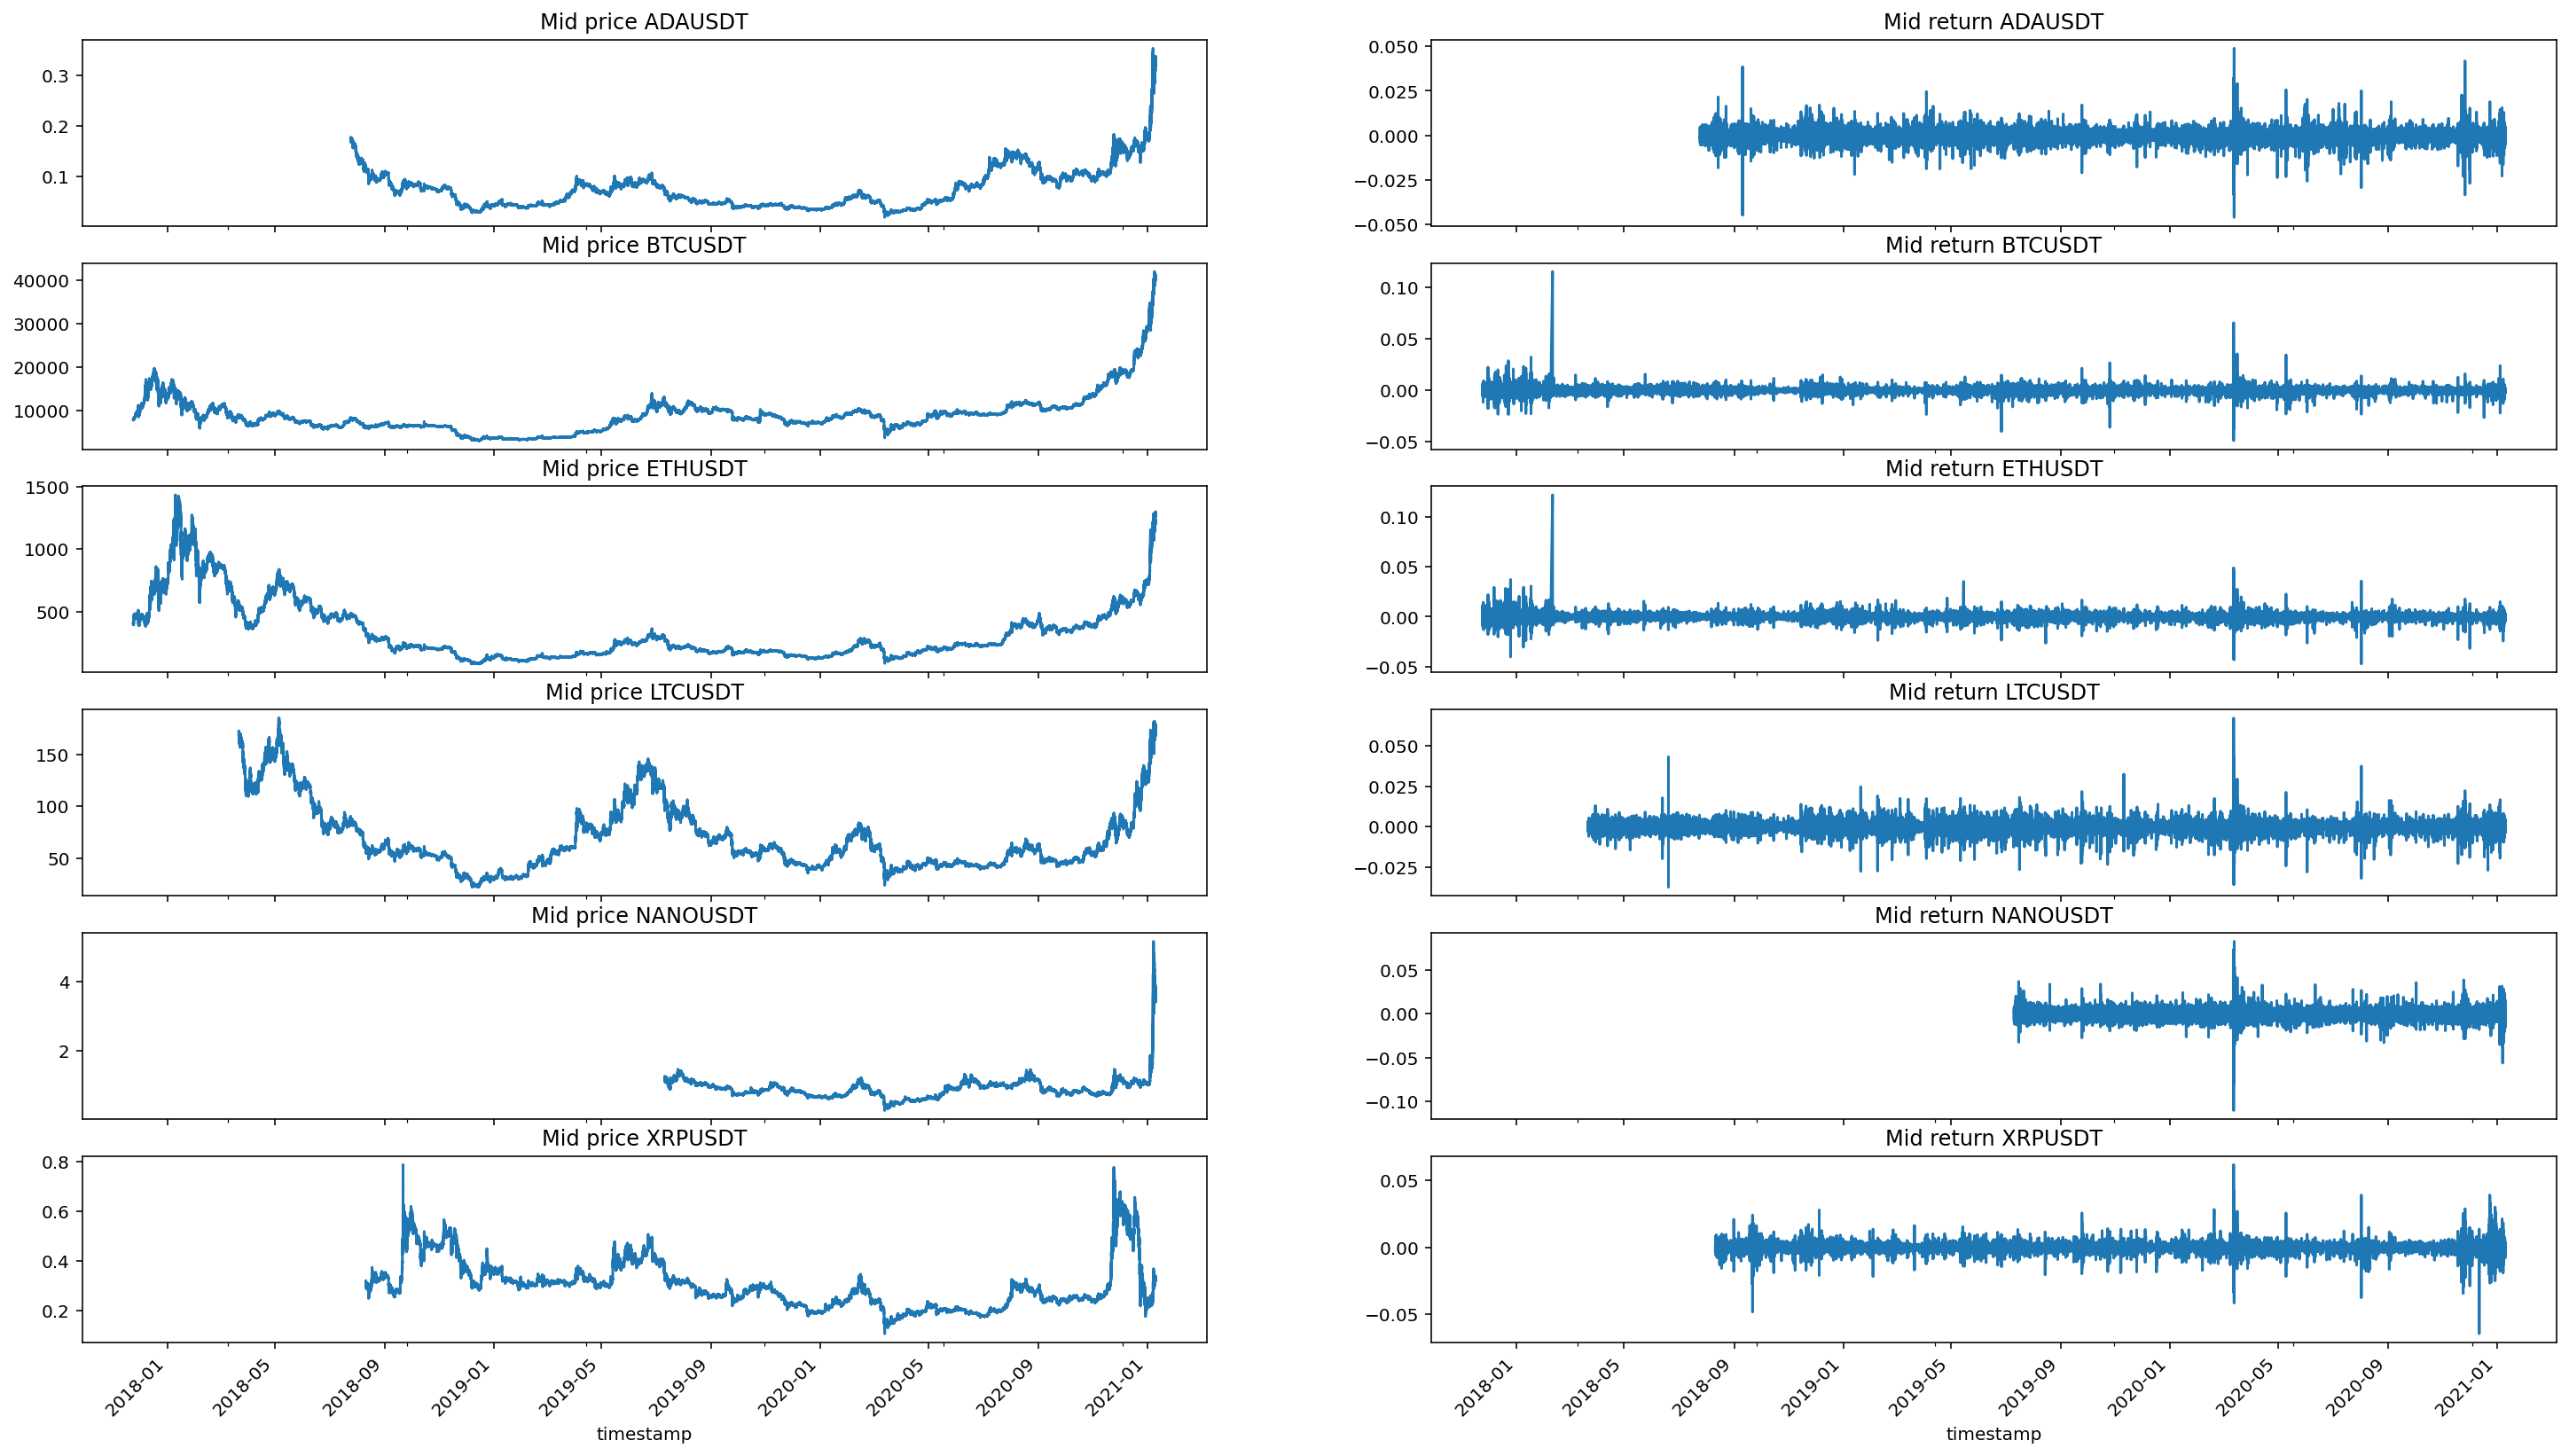

======= ADAUSDT =======
Annualized estimated mean simple return is 27.947
Annualized estimated simple return std deviation is 0.770
Annualized estimated mean log-return is 0.000
Annualized estimated log-return std deviation is 0.019

======= BTCUSDT =======
Annualized estimated mean simple return is 3295538.273
Annualized estimated simple return std deviation is 83344.314
Annualized estimated mean log-return is 0.000
Annualized estimated log-return std deviation is 0.014

======= ETHUSDT =======
Annualized estimated mean simple return is 122631.512
Annualized estimated simple return std deviation is 4544.634
Annualized estimated mean log-return is 0.000
Annualized estimated log-return std deviation is 0.017

======= LTCUSDT =======
Annualized estimated mean simple return is 24953.813
Annualized estimated simple return std deviation is 594.944
Annualized estimated mean log-return is 0.000
Annualized estimated log-return std deviation is 0.017

======= NANOUSDT =======
Annualized estimat

In [12]:
#Plot time series
fig, ax = plt.subplots(len(symbols),2, figsize= (50,20), sharex=True)
for i, coin in enumerate(symbols):
    #Retreive coin specific data
    data_plot = data.iloc[data.index.get_level_values(0) == coin]
    #Get index date fro x axis
    data_plot.index = data_plot.index.get_level_values(1)
    
    #Plot the close price
    data_plot['mid_price'].plot(figsize=(25, 15),
                            title='Mid price ' + coin,
                            ax=ax[i, 0], 
                            rot=45)
    #Plot the return
    data_plot['mid_price_return'].plot(figsize=(25, 15), 
                             title='Mid return ' + coin,
                             ax=ax[i, 1], rot=45 )
plt.savefig('images/intro/Mid price and Mid Return.png', dpi=300)
plt.show()

#Print the annualized mean and std. deviation of log-returns
dt=1.0/365.0
sdt=np.sqrt(dt)
for i, coin in enumerate(symbols):
    data_temp = data.iloc[data.index.get_level_values(0) == coin]
    print("======= " + coin + " =======")
    print('Annualized estimated mean simple return is {:05.3f}'.format(np.mean(data_temp['mid_price'])/dt))
    print('Annualized estimated simple return std deviation is {:05.3f}'.format(np.std(data_temp['mid_price'])/sdt))
    print('Annualized estimated mean log-return is {:05.3f}'.format(np.mean(data_temp['mid_price_log_return'])/dt))
    print('Annualized estimated log-return std deviation is {:05.3f}\n'.format(np.std(data_temp['mid_price_log_return'])/sdt))



In [13]:
returns = data.unstack(level=0)[['mid_price']]
display(returns.head())
display(returns.shape)

mid_price                                            \
                      ADAUSDT      BTCUSDT     ETHUSDT LTCUSDT NANOUSDT   
timestamp                                                                 
2017-11-24 00:00:30       NaN  8002.583583  404.943269     NaN      NaN   
2017-11-24 00:01:00       NaN  8014.383542  404.020000     NaN      NaN   
2017-11-24 00:01:30       NaN  8022.228000  406.002500     NaN      NaN   
2017-11-24 00:02:00       NaN  8011.573333  406.258333     NaN      NaN   
2017-11-24 00:02:30       NaN  8010.548333  407.007000     NaN      NaN   

                             
                    XRPUSDT  
timestamp                    
2017-11-24 00:00:30     NaN  
2017-11-24 00:01:00     NaN  
2017-11-24 00:01:30     NaN  
2017-11-24 00:02:00     NaN  
2017-11-24 00:02:30     NaN

(3275491, 6)

### Group data with differrent interesting intervals

In [14]:
returns_30s = returns.groupby([pd.Grouper(freq='30s', origin=0, label='right')]).last()

returns_30s[symbols]=returns_30s.mid_price.pct_change()
returns_30s.columns = pd.MultiIndex.from_product([['mid_price', 'mid_return'], symbols], names=['Feature', 'Symbol'])
returns_30s.shape

(3291840, 12)

In [15]:
returns_1m = returns.groupby([pd.Grouper(freq='1min', origin=0, label='right')]).last()

returns_1m[symbols]=returns_1m.mid_price.pct_change()
returns_1m.columns = pd.MultiIndex.from_product([['mid_price', 'mid_return'], symbols], names=['Feature', 'Symbol'])
returns_1m.shape

(1645921, 12)

In [16]:
returns_1h = returns.groupby([pd.Grouper(freq='1h', origin=0, label='right')]).last()

returns_1h[symbols]=returns_1h.mid_price.pct_change()
returns_1h.columns = pd.MultiIndex.from_product([['mid_price', 'mid_return'], symbols], names=['Feature', 'Symbol'])
returns_1h.shape

(27433, 12)

In [17]:
returns_1d = returns.groupby([pd.Grouper(freq='1d', origin=0, label='right')]).last()

returns_1d[symbols]=returns_1d.mid_price.pct_change()
returns_1d.columns = pd.MultiIndex.from_product([['mid_price', 'mid_return'], symbols], names=['Feature', 'Symbol'])
returns_1d.shape

(1144, 12)

In [18]:
returns_1w = returns.groupby([pd.Grouper(freq='7d', origin=0, label='right')]).last()

returns_1w[symbols]=returns_1w.mid_price.pct_change()
returns_1w.columns = pd.MultiIndex.from_product([['mid_price', 'mid_return'], symbols], names=['Feature', 'Symbol'])
returns_1w.shape

(164, 12)

In [19]:
returns_1w.mid_return.rolling(window=31,min_periods=31).corr()

Symbol                ADAUSDT   BTCUSDT   ETHUSDT   LTCUSDT  NANOUSDT  \
timestamp  Symbol                                                       
2017-11-30 ADAUSDT        NaN       NaN       NaN       NaN       NaN   
           BTCUSDT        NaN       NaN       NaN       NaN       NaN   
           ETHUSDT        NaN       NaN       NaN       NaN       NaN   
           LTCUSDT        NaN       NaN       NaN       NaN       NaN   
           NANOUSDT       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
2021-01-14 BTCUSDT   0.626548  1.000000  0.792415  0.901358  0.570886   
           ETHUSDT   0.829956  0.792415  1.000000  0.755976  0.772467   
           LTCUSDT   0.633594  0.901358  0.755976  1.000000  0.500517   
           NANOUSDT  0.825940  0.570886  0.772467  0.500517  1.000000   
           XRPUSDT   0.493584  0.141225  0.398521  0.241167  0.510522   

Symbol                XRPUSDT  
timestamp  Symbol              
2017-11-30 ADAUSDT        NaN  
           BTCUSDT        NaN  
           ETHUSDT        NaN  
           LTCUSDT        NaN  
           NANOUSDT       NaN  
...                       ...  
2021-01-14 BTCUSDT   0.141225  
           ETHUSDT   0.398521  
           LTCUSDT   0.241167  
           NANOUSDT  0.510522  
           XRPUSDT   1.000000  

[984 rows x 6 columns]

Symbol       ADAUSDT   ETHUSDT   LTCUSDT  NANOUSDT   XRPUSDT
timestamp                                                   
2021-01-07  0.479024  0.478921  0.709530  0.385316  0.269466
2021-01-08  0.375606  0.448084  0.675270  0.433283  0.339398
2021-01-09  0.325345  0.393059  0.642820  0.413557  0.326576
2021-01-10  0.296870  0.375239  0.629851  0.433219  0.321905
2021-01-11  0.279096  0.360019  0.619375  0.427462  0.321093

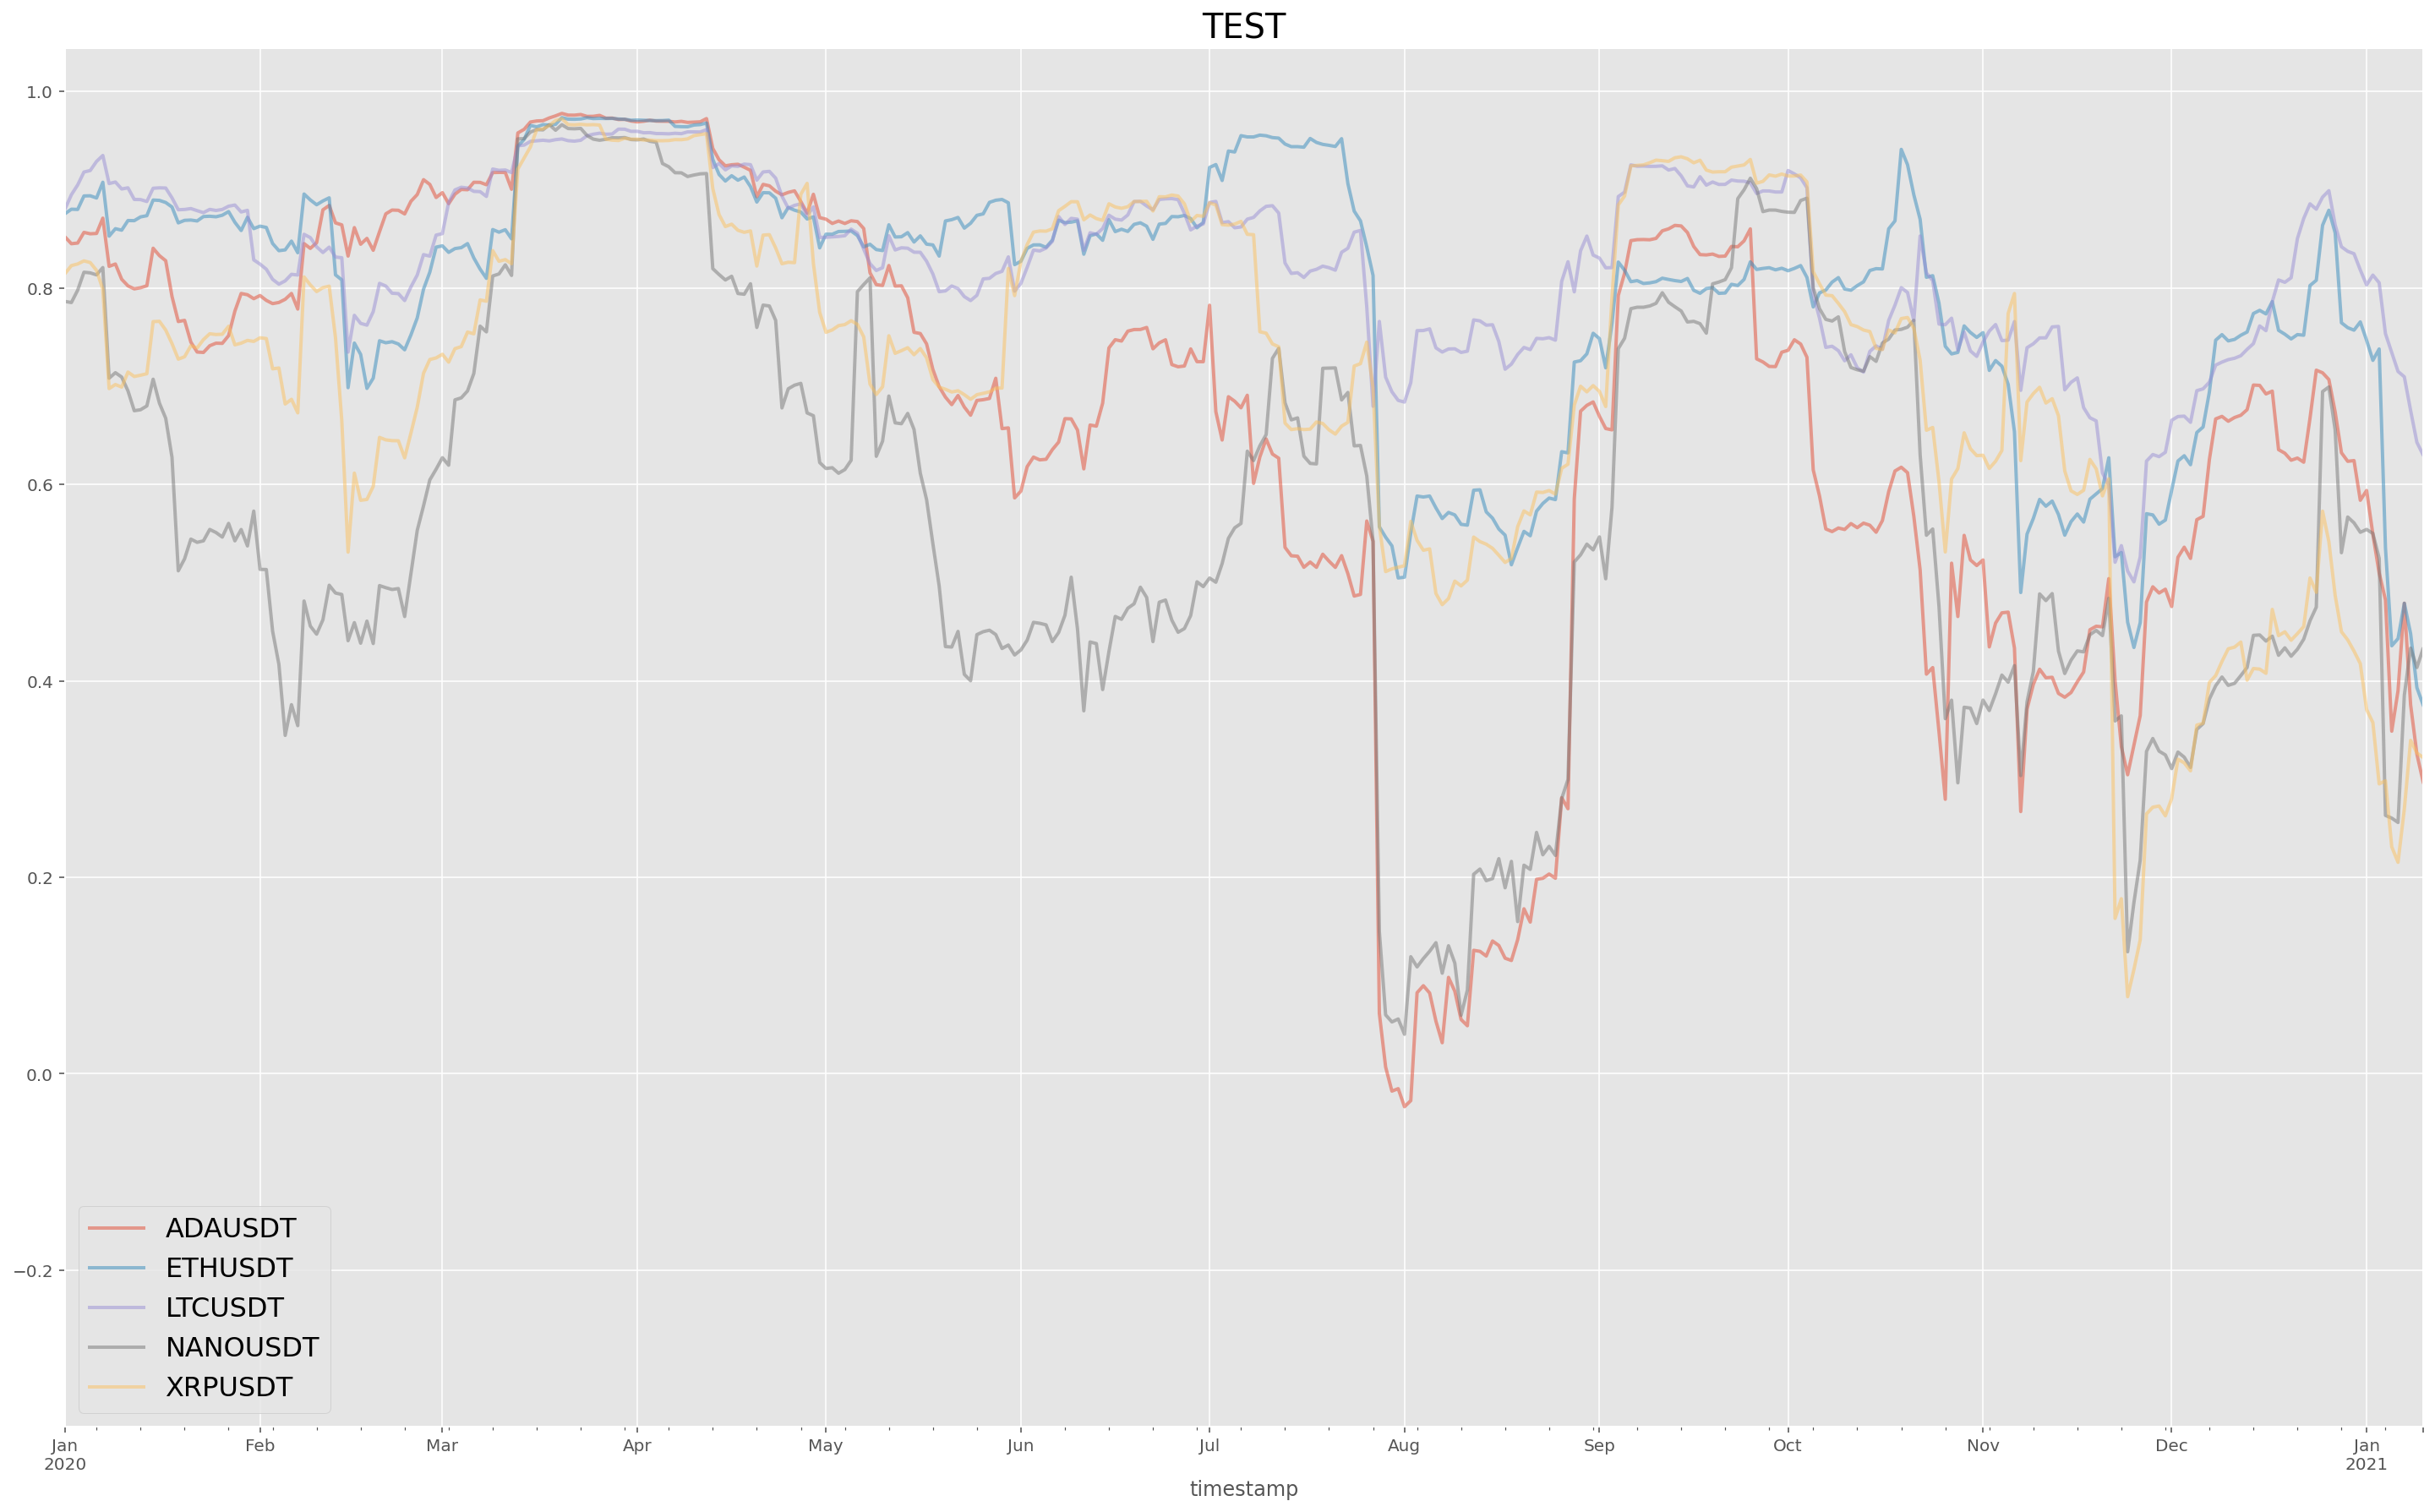

In [37]:
ts_corr = returns_1d.mid_return.rolling(window=31,min_periods=7).corr()

#Keep rows corr with BTC and suppress index
btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop('BTCUSDT', axis=1)#.dropna()
display(btc_corr.tail())

plt.style.use('ggplot')

title='TEST'
#btc_corr.rolling(window=60*24*20,min_periods=7).mean().plot(figsize=(25, 15), linewidth=2, alpha=0.5)
btc_corr.plot(figsize=(25, 15), linewidth=2, alpha=0.5)
plt.title(title, fontsize=20)
plt.legend(loc=0, prop={'size': 16})
plt.xlim(left=datetime(2020, 1, 1), right=datetime(2021, 1, 10))
#plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()

Symbol                ADAUSDT   ETHUSDT   LTCUSDT  NANOUSDT   XRPUSDT
timestamp                                                            
2021-01-09 21:00:00  0.478863  0.686275  0.706144  0.142808  0.362244
2021-01-09 22:00:00  0.480062  0.687784  0.709893  0.144580  0.356104
2021-01-09 23:00:00  0.483206  0.689173  0.709678  0.144519  0.364426
2021-01-10 00:00:00  0.483234  0.689579  0.707263  0.145290  0.365249
2021-01-10 01:00:00  0.485073  0.690337  0.707617  0.145465  0.368128

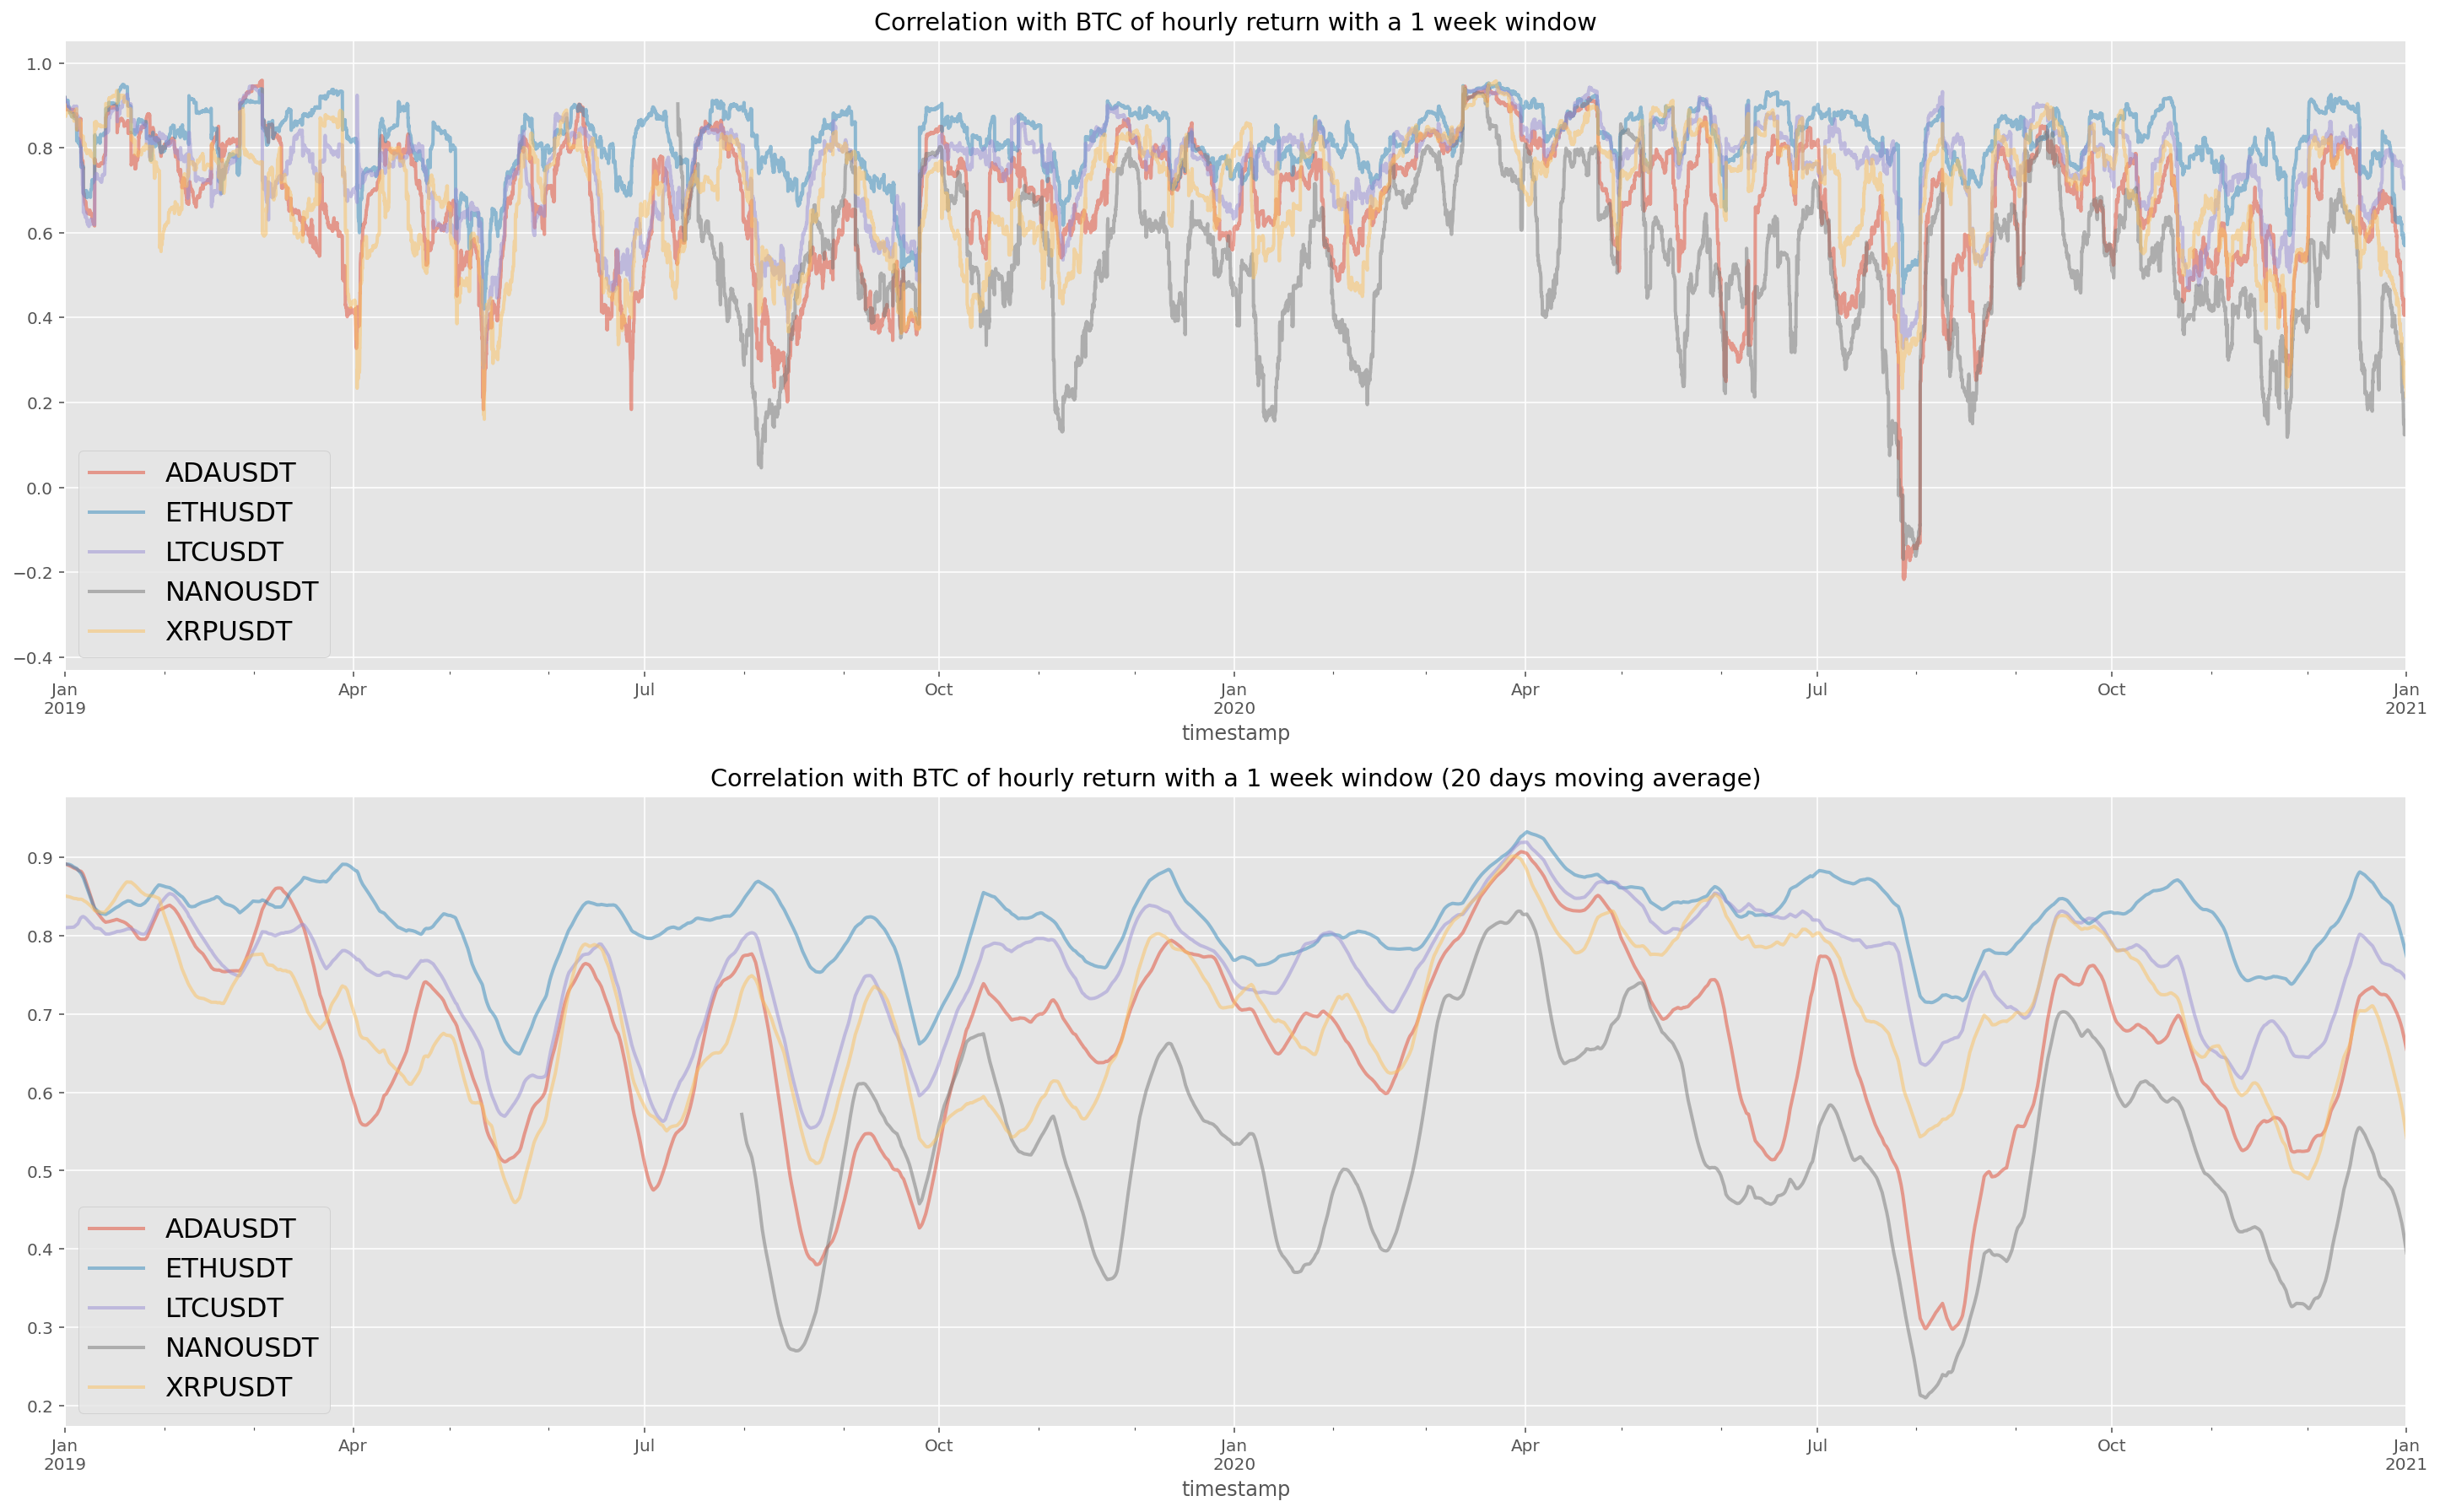

In [40]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
fig.tight_layout()

ts_corr = returns_1h.mid_return.rolling(window=24*7,min_periods=7).corr()#.dropna()

#Keep rows corr with BTC and suppress index
btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop('BTCUSDT', axis=1)#.dropna()
display(btc_corr.tail())

plt.style.use('ggplot')
plt.subplots_adjust(hspace=0.2)

title='Correlation with BTC of hourly return with a 1 week window_both'
#btc_corr.rolling(24*20).mean().plot(figsize=(25, 15), linewidth=2, alpha=0.5)
btc_corr.plot(legend=None, linewidth=2, alpha=0.5, ax=axs[0], title='Correlation with BTC of hourly return with a 1 week window')
btc_corr.rolling(24*20).mean().plot(linewidth=2, alpha=0.5, ax=axs[1], title='Correlation with BTC of hourly return with a 1 week window (20 days moving average)')
axs[0].set_xlim([datetime(2019, 1, 1), datetime(2021, 1, 1)])
axs[0].legend(loc=0, prop={'size': 16})
axs[1].set_xlim([datetime(2019, 1, 1), datetime(2021, 1, 1)])
axs[1].legend(loc=0, prop={'size': 16})

#plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()

### Zoom in stable period lockdown

Symbol                ADAUSDT   ETHUSDT   LTCUSDT  NANOUSDT   XRPUSDT
timestamp                                                            
2021-01-09 21:00:00  0.673082  0.782536  0.794948  0.294798  0.725985
2021-01-09 22:00:00  0.706462  0.727927  0.761435  0.223796  0.716311
2021-01-09 23:00:00  0.675435  0.692142  0.734238  0.087086  0.703510
2021-01-10 00:00:00  0.696888  0.694711  0.701942  0.119169  0.756081
2021-01-10 01:00:00  0.710750  0.689900  0.697521  0.051814  0.781071

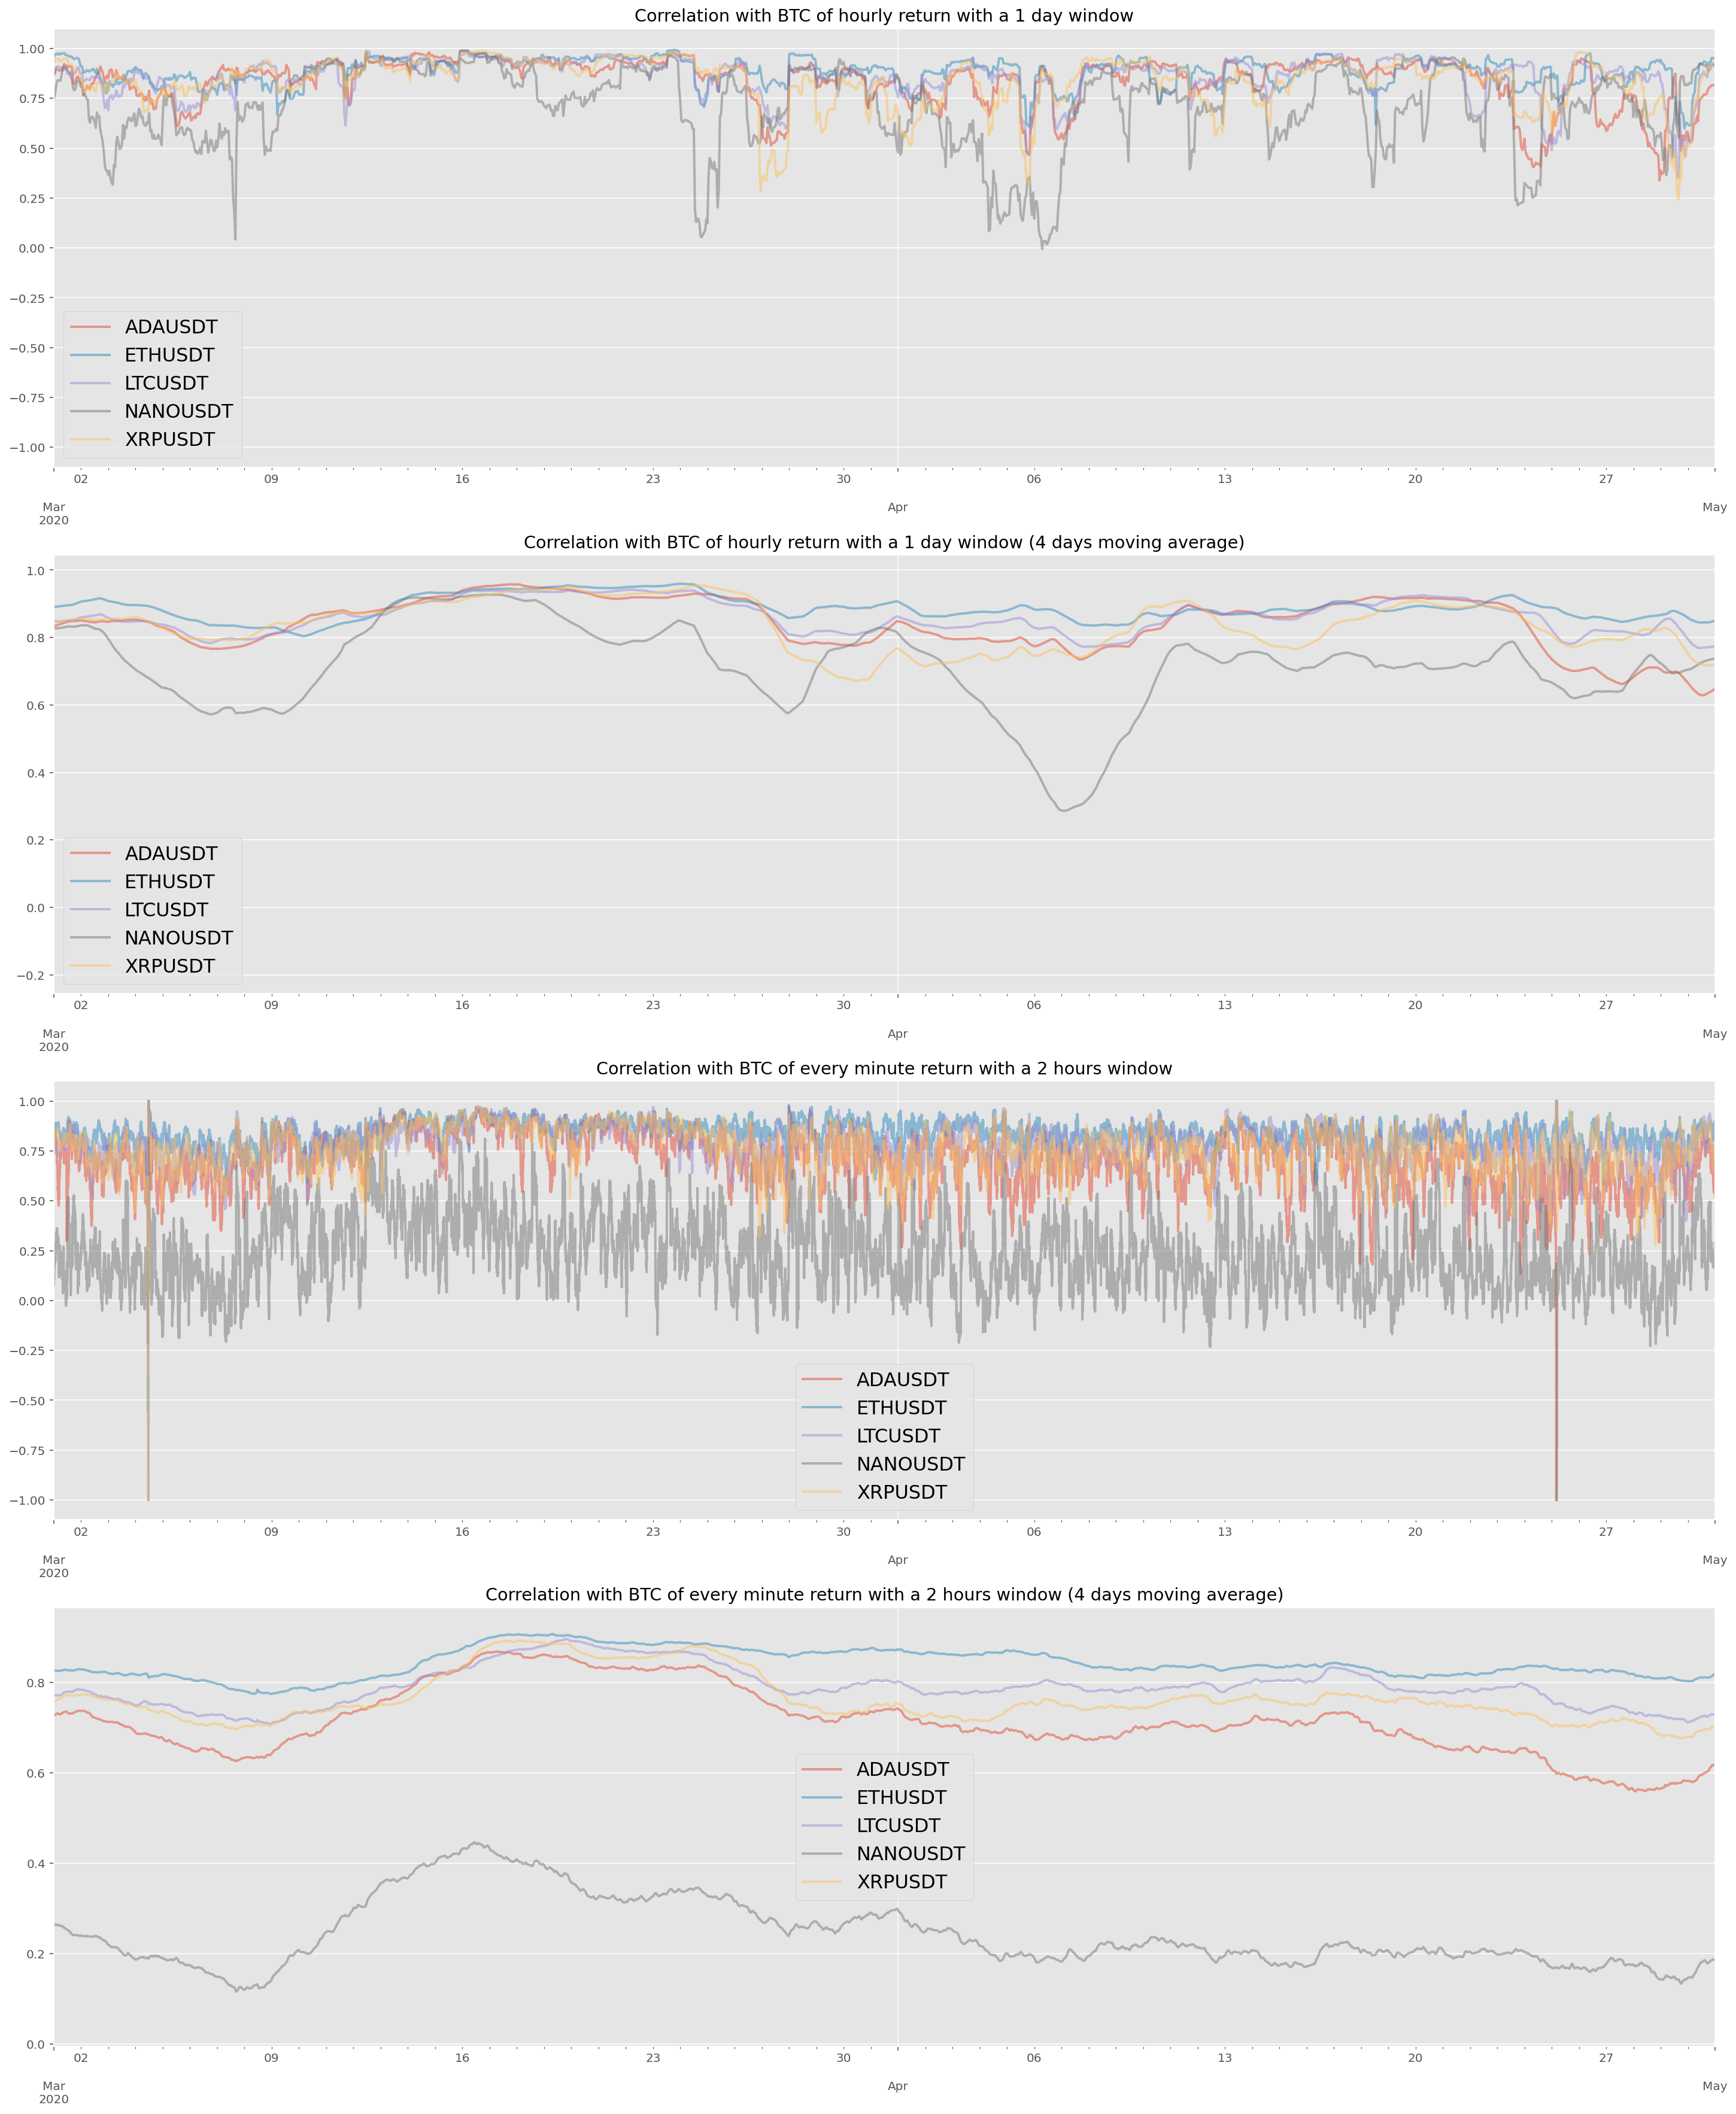

In [44]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 24))
fig.tight_layout()

ts_corr = returns_1h.mid_return.rolling(window=24,min_periods=2).corr()#.dropna()

#Keep rows corr with BTC and suppress index
btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop('BTCUSDT', axis=1)#.dropna()
display(btc_corr.tail())

plt.style.use('ggplot')
plt.subplots_adjust(hspace=0.2)

title='STABLE ZONE ANALYSIS'
btc_corr.plot(legend=None, linewidth=2, alpha=0.5, ax=axs[0], title='Correlation with BTC of hourly return with a 1 day window')
btc_corr.rolling(24*4).mean().plot(linewidth=2, alpha=0.5, ax=axs[1], title='Correlation with BTC of hourly return with a 1 day window (4 days moving average)')
axs[0].set_xlim([datetime(2020, 3, 1), datetime(2020, 5, 1)])
axs[0].legend(loc=0, prop={'size': 16})
axs[0].set_xlabel('')
axs[1].set_xlim([datetime(2020, 3, 1), datetime(2020, 5, 1)])
axs[1].legend(loc=0, prop={'size': 16})
axs[1].set_xlabel('')


ts_corr = returns_1m.mid_return.rolling(window=60*2,min_periods=2).corr()#.dropna()

#Keep rows corr with BTC and suppress index
btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop('BTCUSDT', axis=1)#.dropna()
btc_corr.plot(legend=None, linewidth=2, alpha=0.5, ax=axs[2], title='Correlation with BTC of every minute return with a 2 hours window')
btc_corr.rolling(60*24*4, min_periods=5).mean().plot(linewidth=2, alpha=0.5, ax=axs[3], title='Correlation with BTC of every minute return with a 2 hours window (4 days moving average)')
axs[2].set_xlim([datetime(2020, 3, 1), datetime(2020, 5, 1)])
axs[2].legend(loc=0, prop={'size': 16})
axs[2].set_xlabel('')
axs[3].set_xlim([datetime(2020, 3, 1), datetime(2020, 5, 1)])
axs[3].legend(loc=0, prop={'size': 16})
axs[3].set_xlabel('')


plt.savefig('images/correlations/'+title+'.png', dpi=300, bbox_inches='tight')
plt.show()




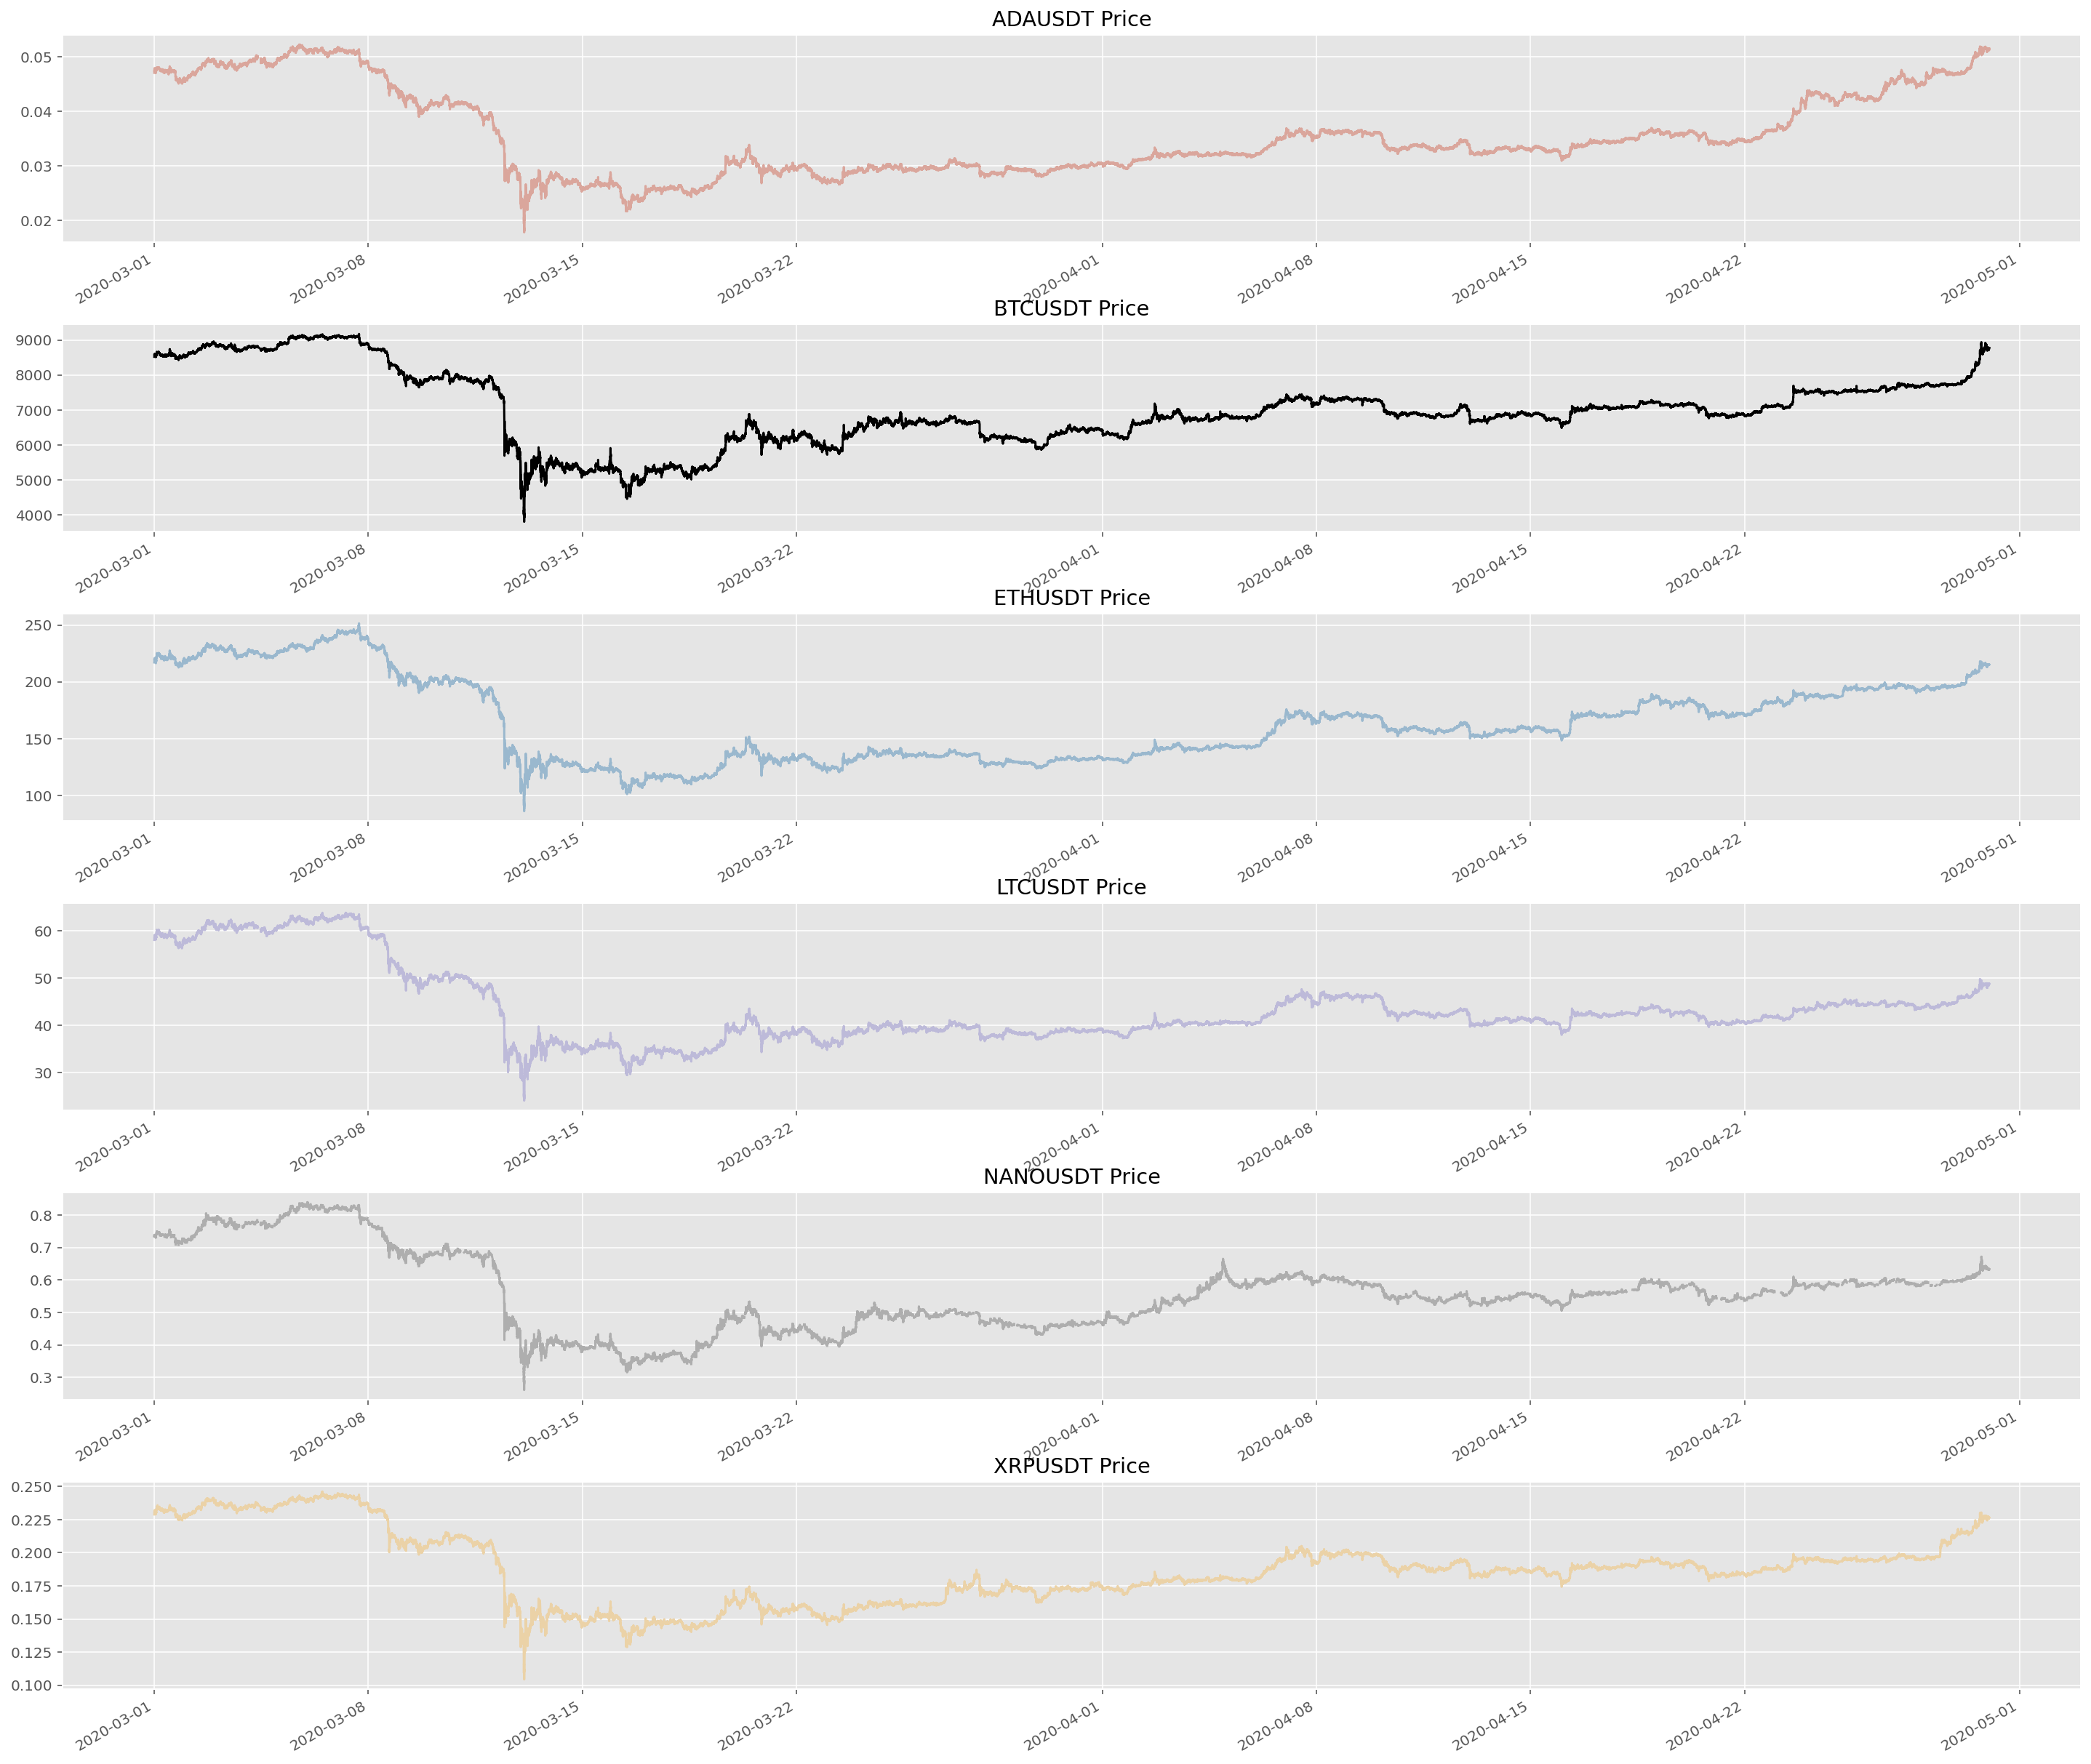

In [23]:
array = [datetime(2020, 3, 1, 0, 0, 30)+timedelta(seconds=i*30) for i in range(2*60*24*2*30)]
data_uncorr = data[data.index.isin(array, level=1)]
data_uncorr

fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(20, 20))
fig.tight_layout()

data_uncorr.mid_price.unstack(level=0).ADAUSDT.plot(grid=True, title='ADAUSDT Price', ax=axs[0], color=(218/255, 166/255, 156/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).BTCUSDT.plot(grid=True, title='BTCUSDT Price', ax=axs[1], color='black', xlabel='')
data_uncorr.mid_price.unstack(level=0).ETHUSDT.plot(grid=True, title='ETHUSDT Price', ax=axs[2], color=(154/255, 184/255, 206/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).LTCUSDT.plot(grid=True, title='LTCUSDT Price', ax=axs[3], color=(189/255, 186/255, 217/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).NANOUSDT.plot(grid=True, title='NANOUSDT Price', ax=axs[4], color=(174/255, 174/255, 174/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).XRPUSDT.plot(grid=True, title='XRPUSDT Price', ax=axs[5], color=(235/255, 210/255, 167/255), xlabel='')
plt.subplots_adjust(hspace =0.4)

title='STABLE ZONE ANALYSIS - b'

#plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()

### Zoom in crash period summer 2020

Symbol                ADAUSDT   ETHUSDT   LTCUSDT  NANOUSDT   XRPUSDT
timestamp                                                            
2021-01-09 23:58:30  0.900776  0.752314  0.712158 -0.015204  0.938997
2021-01-09 23:59:00  0.853687  0.643514  0.389329  0.544562  0.990338
2021-01-09 23:59:30  0.777793  0.861455  0.393052  0.656031  0.987580
2021-01-10 00:00:00 -0.194673  0.969365  0.895997  0.949493  0.815928
2021-01-10 00:00:30  0.470237  0.903993  0.250429  0.197795  0.592781

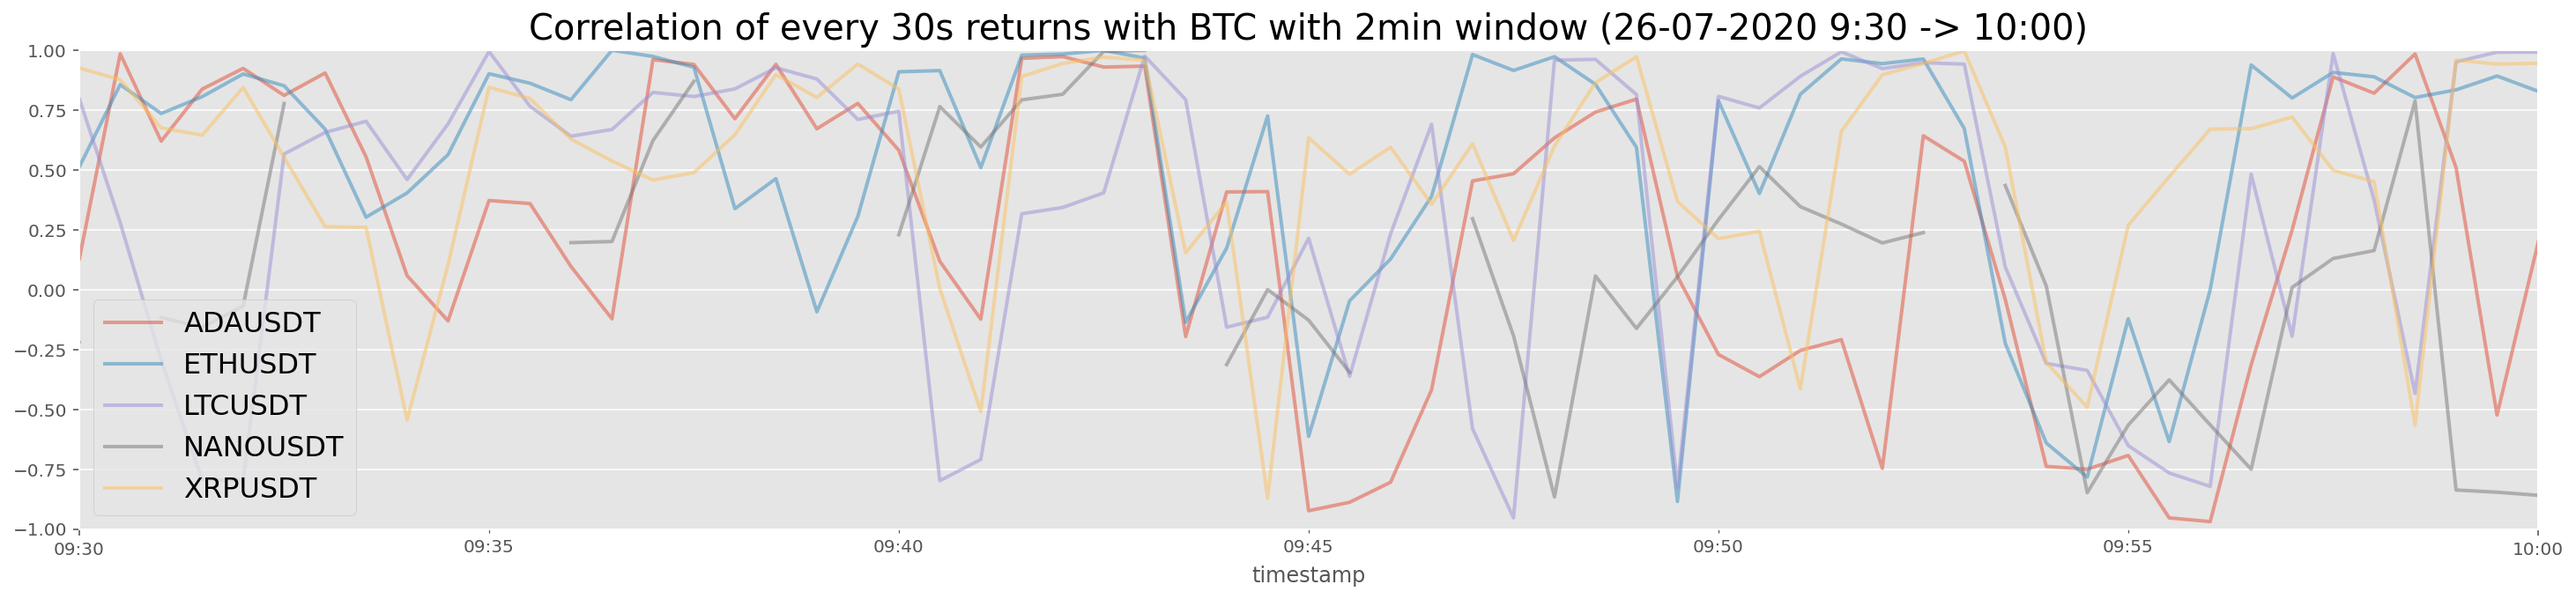

In [24]:
ts_corr = returns_30s.mid_return.rolling(window=4,min_periods=4).corr()#.dropna()

#Keep rows corr with BTC and suppress index
btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop('BTCUSDT', axis=1)#.dropna()
display(btc_corr.tail())

plt.style.use('ggplot')

title='Correlation of every 30s returns with BTC with 2min window (26-07-2020 9:30 -> 10:00)'
#btc_corr.rolling(window=30,min_periods=4).mean().plot(figsize=(25, 15), linewidth=2, alpha=0.5)
btc_corr.plot(figsize=(25, 5), linewidth=2, alpha=0.5)
plt.title(title, fontsize=20)
plt.legend(loc=0, prop={'size': 16})
plt.xlim(left=datetime(2020, 7, 26, 9, 30), right=datetime(2020, 7, 26, 10))

plt.ylim(-1, 1)
#plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()

In [25]:
array = [datetime(2020, 7, 25)+timedelta(seconds=i*30) for i in range(2*60*24*3)]
data_uncorr = data[data.index.isin(array, level=1)]
data_uncorr

nb_trade  min_price  max_price  mid_price  \
        timestamp                                                        
ADAUSDT 2020-07-25 00:00:00        17    0.12195    0.12204   0.122000   
        2020-07-25 00:00:30        46    0.12195    0.12223   0.122087   
        2020-07-25 00:01:00        58    0.12214    0.12226   0.122206   
        2020-07-25 00:01:30        27    0.12220    0.12228   0.122245   
        2020-07-25 00:02:00        42    0.12225    0.12232   0.122275   
...                               ...        ...        ...        ...   
XRPUSDT 2020-07-27 23:57:30        54    0.22369    0.22393   0.223861   
        2020-07-27 23:58:00        50    0.22355    0.22399   0.223866   
        2020-07-27 23:58:30        38    0.22397    0.22430   0.224128   
        2020-07-27 23:59:00        35    0.22421    0.22435   0.224294   
        2020-07-27 23:59:30        42    0.22422    0.22455   0.224329   

                             volume_tot  mid_price_return  \
        timestamp                                           
ADAUSDT 2020-07-25 00:00:00     70581.6          0.000498   
        2020-07-25 00:00:30    174604.7          0.000712   
        2020-07-25 00:01:00    221654.3          0.000973   
        2020-07-25 00:01:30     86182.4          0.000321   
        2020-07-25 00:02:00    139842.0          0.000244   
...                                 ...               ...   
XRPUSDT 2020-07-27 23:57:30    152825.8          0.000471   
        2020-07-27 23:58:00    183329.2          0.000021   
        2020-07-27 23:58:30     62069.4          0.001170   
        2020-07-27 23:59:00     36978.1          0.000742   
        2020-07-27 23:59:30     60286.1          0.000158   

                             mid_price_log_return  
        timestamp                                  
ADAUSDT 2020-07-25 00:00:00              0.000497  
        2020-07-25 00:00:30              0.000712  
        2020-07-25 00:01:00              0.000973  
        2020-07-25 00:01:30              0.000321  
        2020-07-25 00:02:00              0.000244  
...                                           ...  
XRPUSDT 2020-07-27 23:57:30              0.000471  
        2020-07-27 23:58:00              0.000021  
        2020-07-27 23:58:30              0.001169  
        2020-07-27 23:59:00              0.000742  
        2020-07-27 23:59:30              0.000158  

[46210 rows x 7 columns]

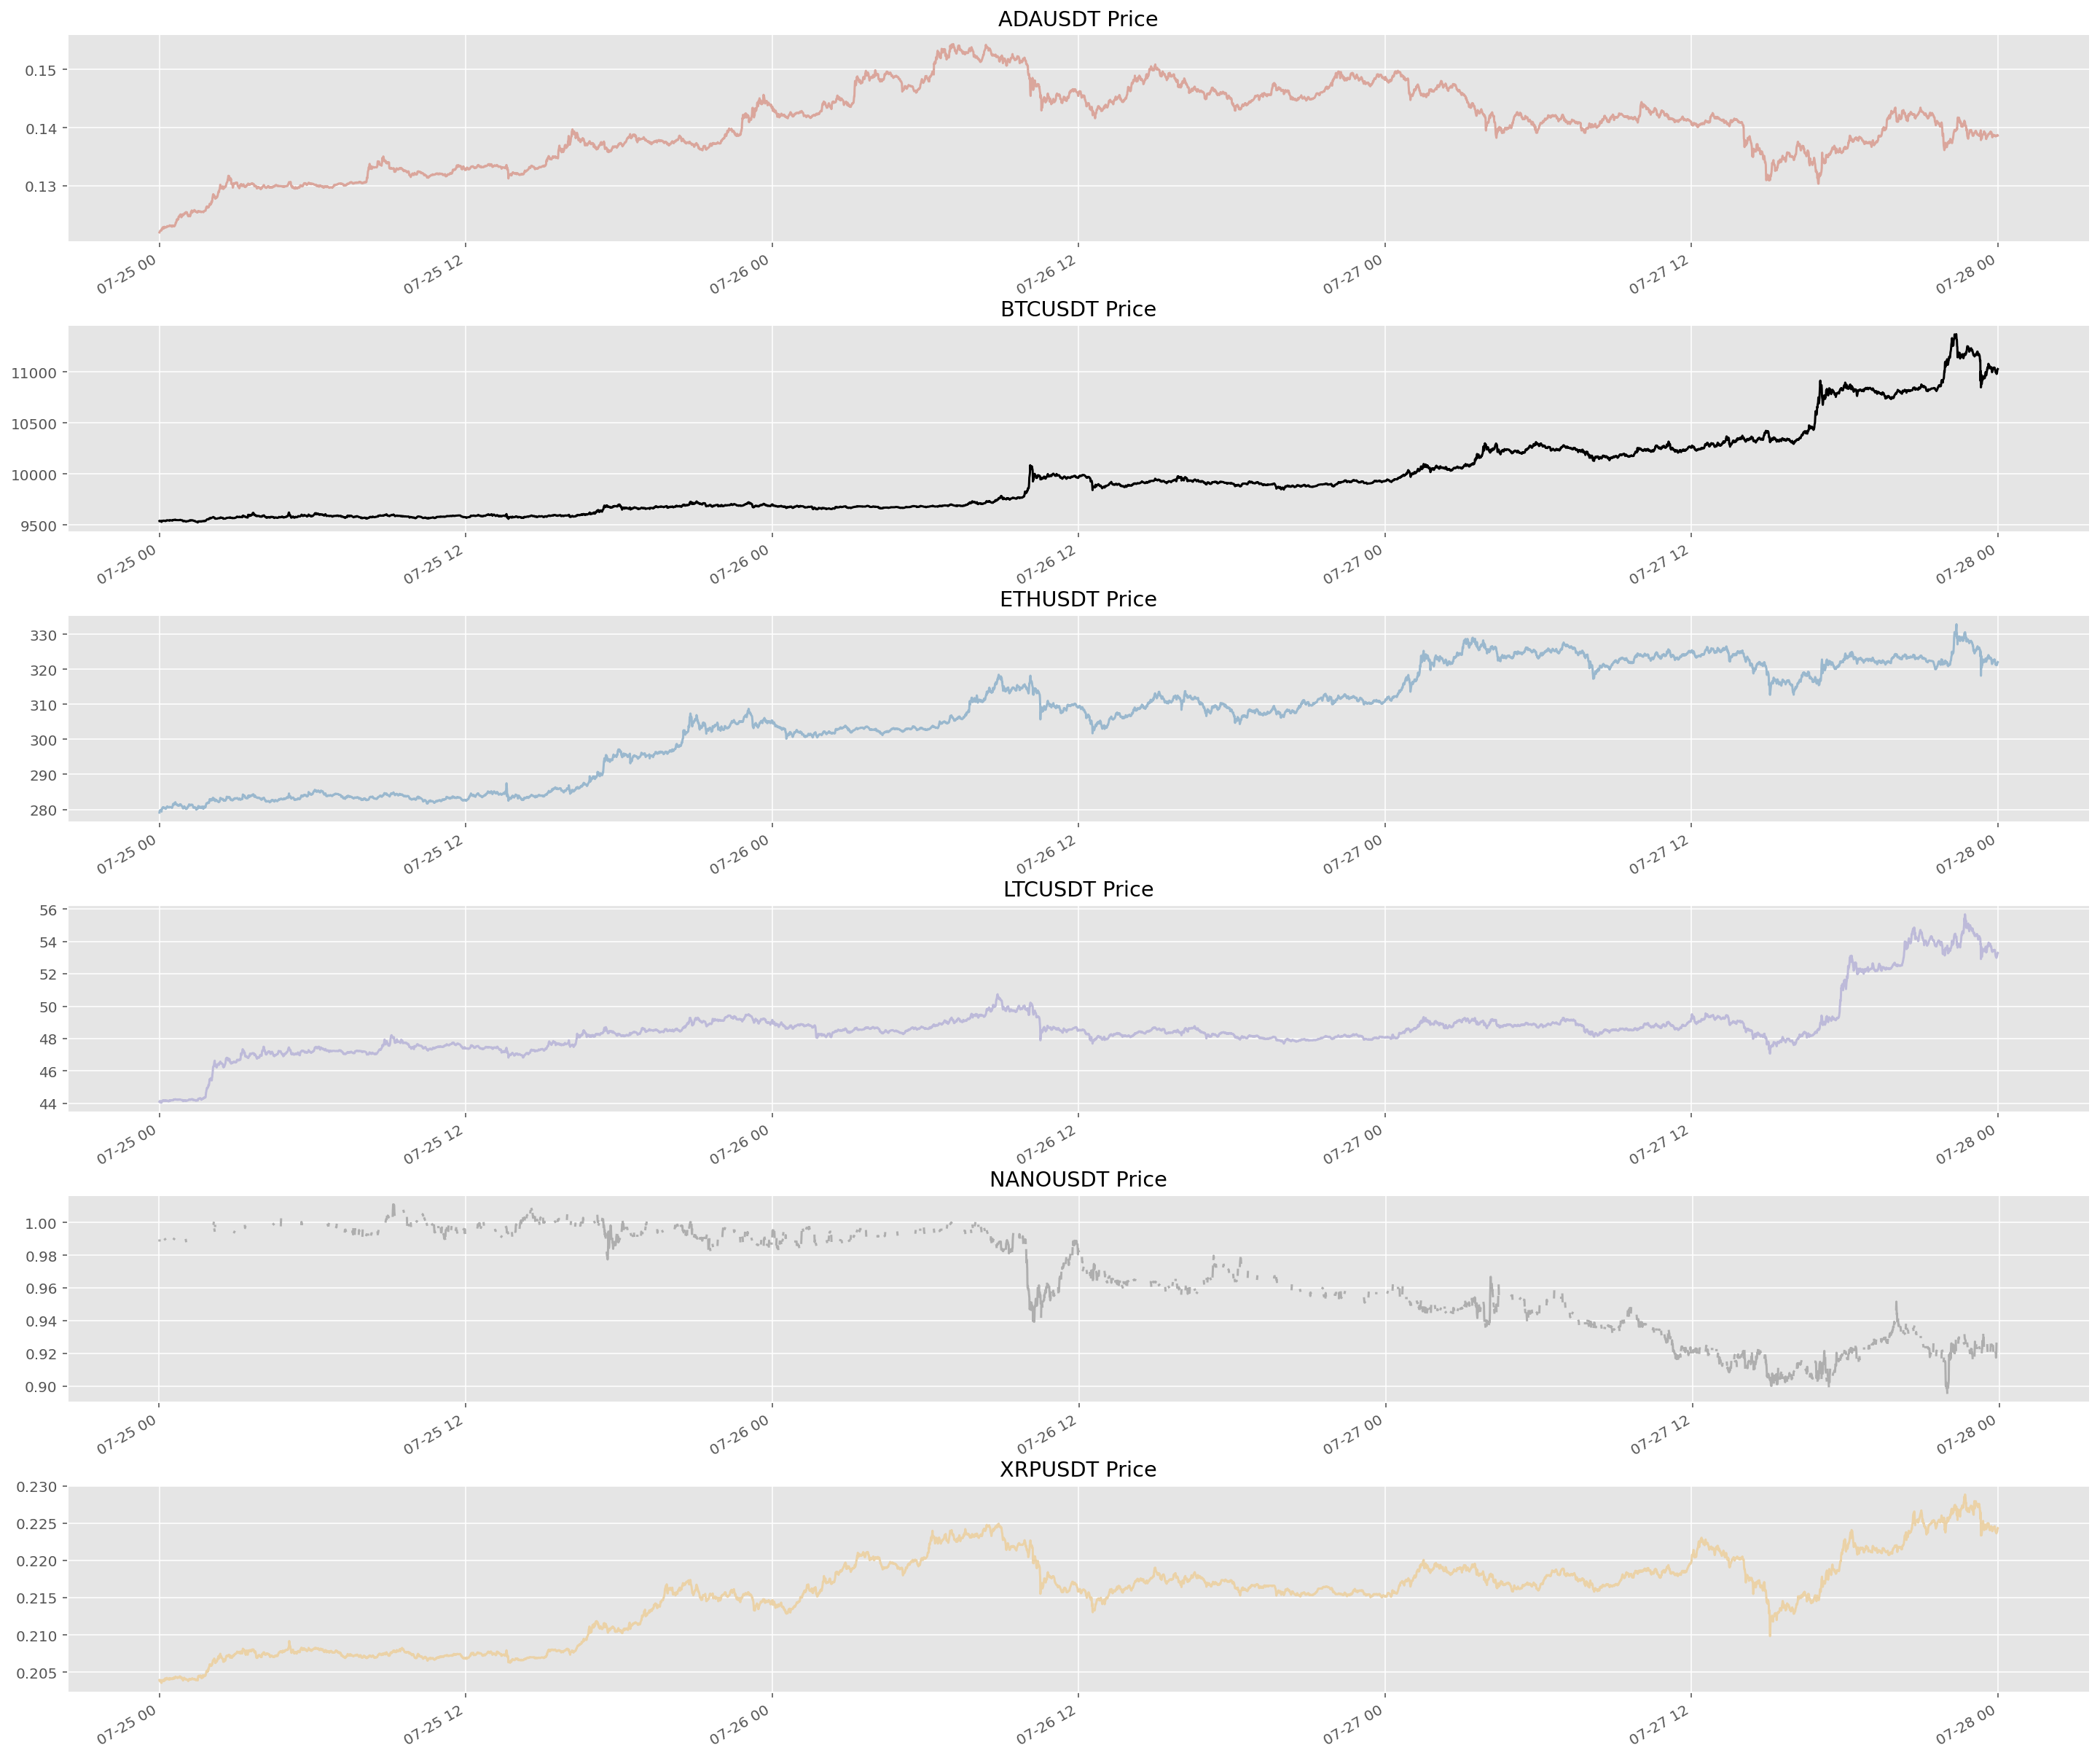

In [26]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(20, 20))
fig.tight_layout()

data_uncorr.mid_price.unstack(level=0).ADAUSDT.plot(grid=True, title='ADAUSDT Price', ax=axs[0], color=(218/255, 166/255, 156/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).BTCUSDT.plot(grid=True, title='BTCUSDT Price', ax=axs[1], color='black', xlabel='')
data_uncorr.mid_price.unstack(level=0).ETHUSDT.plot(grid=True, title='ETHUSDT Price', ax=axs[2], color=(154/255, 184/255, 206/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).LTCUSDT.plot(grid=True, title='LTCUSDT Price', ax=axs[3], color=(189/255, 186/255, 217/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).NANOUSDT.plot(grid=True, title='NANOUSDT Price', ax=axs[4], color=(174/255, 174/255, 174/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).XRPUSDT.plot(grid=True, title='XRPUSDT Price', ax=axs[5], color=(235/255, 210/255, 167/255), xlabel='')
plt.subplots_adjust(hspace =0.4)

title='CRASH ZONE ANALYSIS - b'

#plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()

In [27]:
data.index.get_level_values(1)

DatetimeIndex(['2018-07-25 00:00:30', '2018-07-25 00:01:00',
               '2018-07-25 00:01:30', '2018-07-25 00:02:00',
               '2018-07-25 00:02:30', '2018-07-25 00:03:00',
               '2018-07-25 00:03:30', '2018-07-25 00:04:00',
               '2018-07-25 00:04:30', '2018-07-25 00:05:00',
               ...
               '2021-01-09 23:55:30', '2021-01-09 23:56:00',
               '2021-01-09 23:56:30', '2021-01-09 23:57:00',
               '2021-01-09 23:57:30', '2021-01-09 23:58:00',
               '2021-01-09 23:58:30', '2021-01-09 23:59:00',
               '2021-01-09 23:59:30', '2021-01-10 00:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=14604283, freq=None)

### Daily return correlation in function of the window size 

In [28]:
def create_df_windows(df, symbols, symbol):
    symbols_del = symbols.copy()
    symbols_del.remove(symbol)
    ts_corr = df.rolling(window=7,min_periods=7).corr()
    coin_btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop(symbols_del, axis=1)
    win_size = [10]
    for i in range(30, 365, 20):
        ts_corr = df.rolling(window=i,min_periods=7).corr()
        a = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop(symbols_del, axis=1)
        coin_btc_corr = pd.concat([coin_btc_corr, a], axis=1)
        win_size.append(i)
    coin_btc_corr.columns = win_size
    return coin_btc_corr, win_size
    
ETH_btc_corr,win_size = create_df_windows(returns_1d.mid_return, symbols, 'ETHUSDT')
ETH_btc_corr.tail(2)

10        30        50        70        90        110  \
timestamp                                                                
2021-01-10 -0.068255  0.352531  0.533229  0.536078  0.555611  0.580990   
2021-01-11  0.168135  0.338771  0.550894  0.539202  0.556682  0.581377   

                 130       150       170       190       210       230  \
timestamp                                                                
2021-01-10  0.633015  0.632075  0.624876  0.627964  0.639108  0.655702   
2021-01-11  0.624772  0.635813  0.625656  0.628150  0.638194  0.655690   

                 250       270       290      310       330       350  
timestamp                                                              
2021-01-10  0.672099  0.689015  0.707123  0.81712  0.820747  0.814243  
2021-01-11  0.672954  0.687683  0.707174  0.81879  0.819944  0.813995

In [29]:
symbs, dfs = [], []

for symbol in symbols:
    if symbol != 'BTCUSDT':
        symbs.append(symbol[:-4])
        df, win_size = create_df_windows(returns_1d.mid_return, symbols, symbol)
        dfs.append(df)

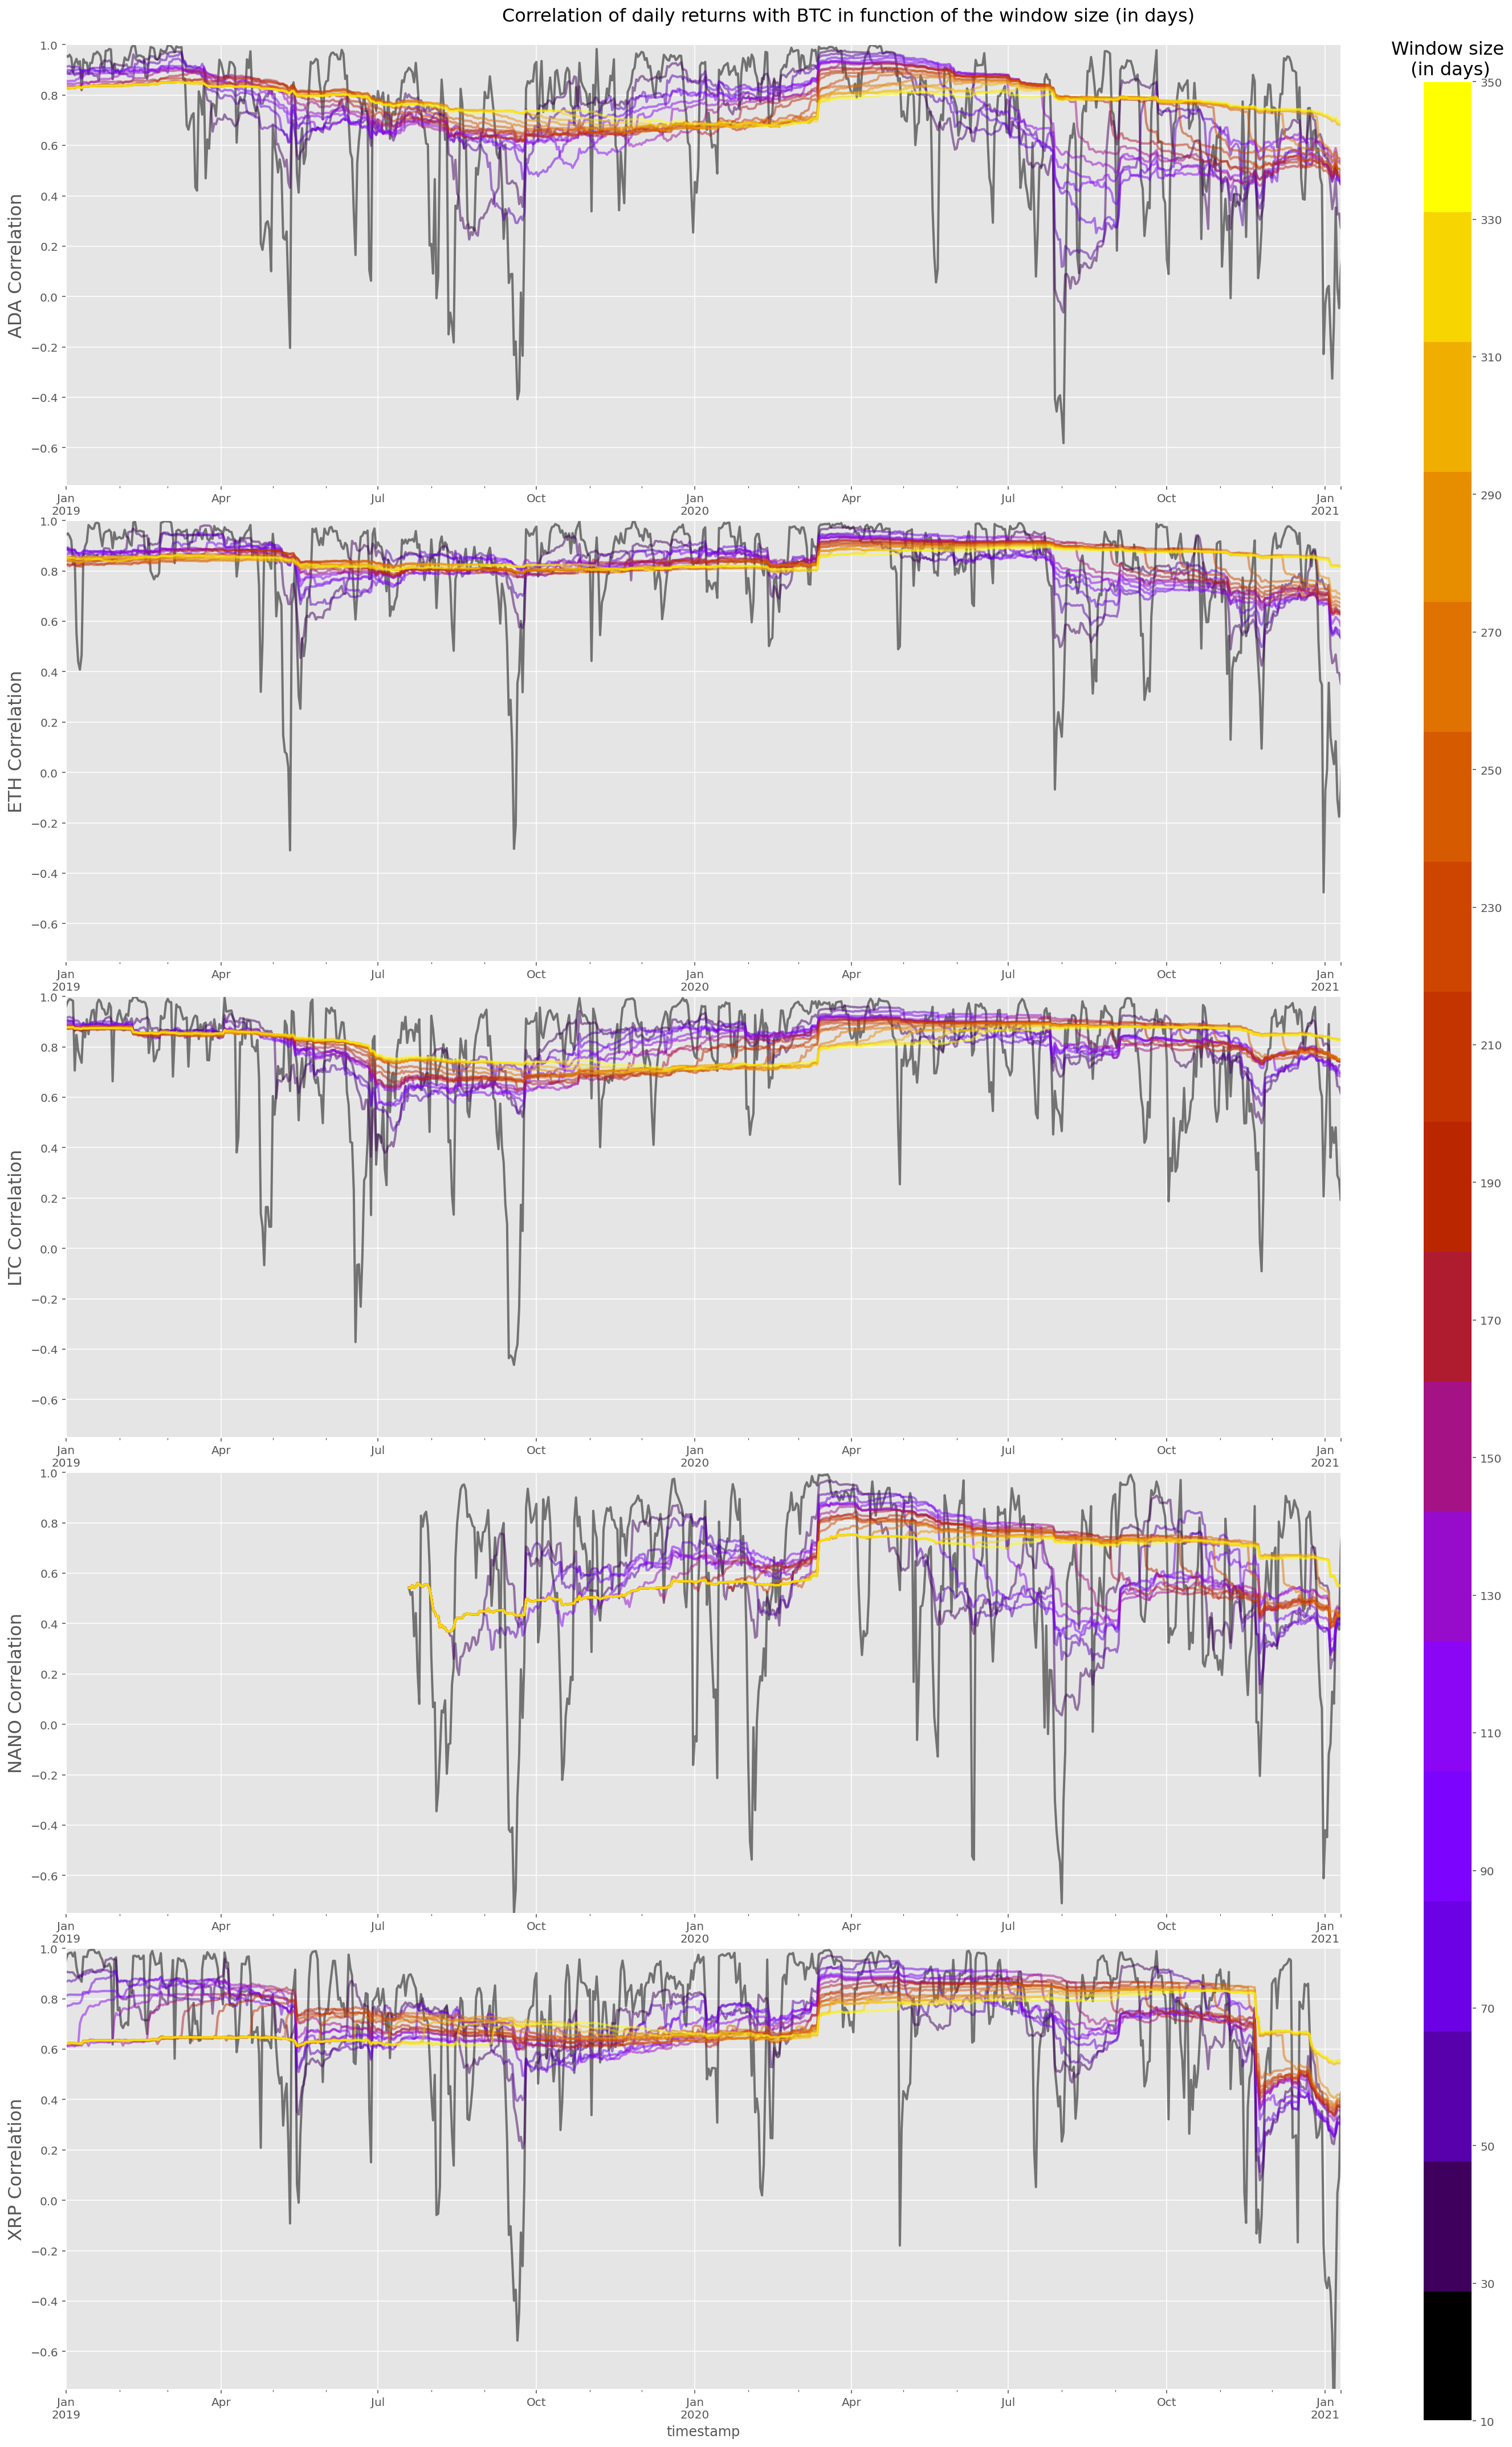

In [35]:
# setup the normalization and the colormap
normalize = mpl.colors.Normalize(min(win_size), max(win_size))
#colormap = plt.cm.gnuplot
colormap = cm.get_cmap('gnuplot', len(win_size)) 
color = plt.cm.gnuplot(np.linspace(0, 1,len(win_size)))
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(20, 30))
fig.tight_layout()

for i in range(len(axs)):
    dfs[i].plot(linewidth=2, alpha=0.5, legend=None, ax=axs[i])
    axs[i].set_ylabel(symbs[i]+' Correlation', fontsize=16)
    axs[i].set_xlim(left=datetime(2019, 1, 1), right=datetime(2021, 1, 10))
    axs[i].set_ylim(-0.75, 1)

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(win_size)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0, 0.03, 0.95])
clb = fig.colorbar(scalarmappaple, cax=cbar_ax, ticks=win_size)
clb.ax.set_title('Window size\n (in days)', fontsize=16)

title = 'Correlation of daily returns with BTC in function of the window size (in days)'
fig.suptitle(title, fontsize=16)
plt.subplots_adjust(top =0.965)

plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()

### Hayashi and Yoshida Covariance 2020

In [45]:
symbols_no_btc = ['ADAUSDT', 'ETHUSDT', 'LTCUSDT', 'NANOUSDT', 'XRPUSDT']
symbols

['ADAUSDT', 'BTCUSDT', 'ETHUSDT', 'LTCUSDT', 'NANOUSDT', 'XRPUSDT']

In [116]:
#save 2020 data only
for symbol in symbols:
    symb = symbol[:-4]

    df = pd.read_parquet('data.nosync/_all/'+symbol+'.pq')
    df = df[(df.index>=datetime(2020,7,26)) & (df.index<=datetime(2020,7,27))]  
    df = df.astype({'price': 'float'})
    df = df[df.is_trade_best_price==True]
    df.drop(columns='is_trade_best_price', inplace=True)

    #group same transactions
    df2 = df.groupby(df.index).agg({'price':'mean'}).reset_index()
    df2.columns = df2.columns.get_level_values(0)
    df2.index = df2.timestamp
    
    #df2.to_parquet(f'data.nosync/_2020/{symbol}.pq')

<ipython-input-291-d263b1615f4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_btc['return_BTC'] = df_btc.price.pct_change()
/Users/lpdbrx/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
No handles with labels found to put in legend.


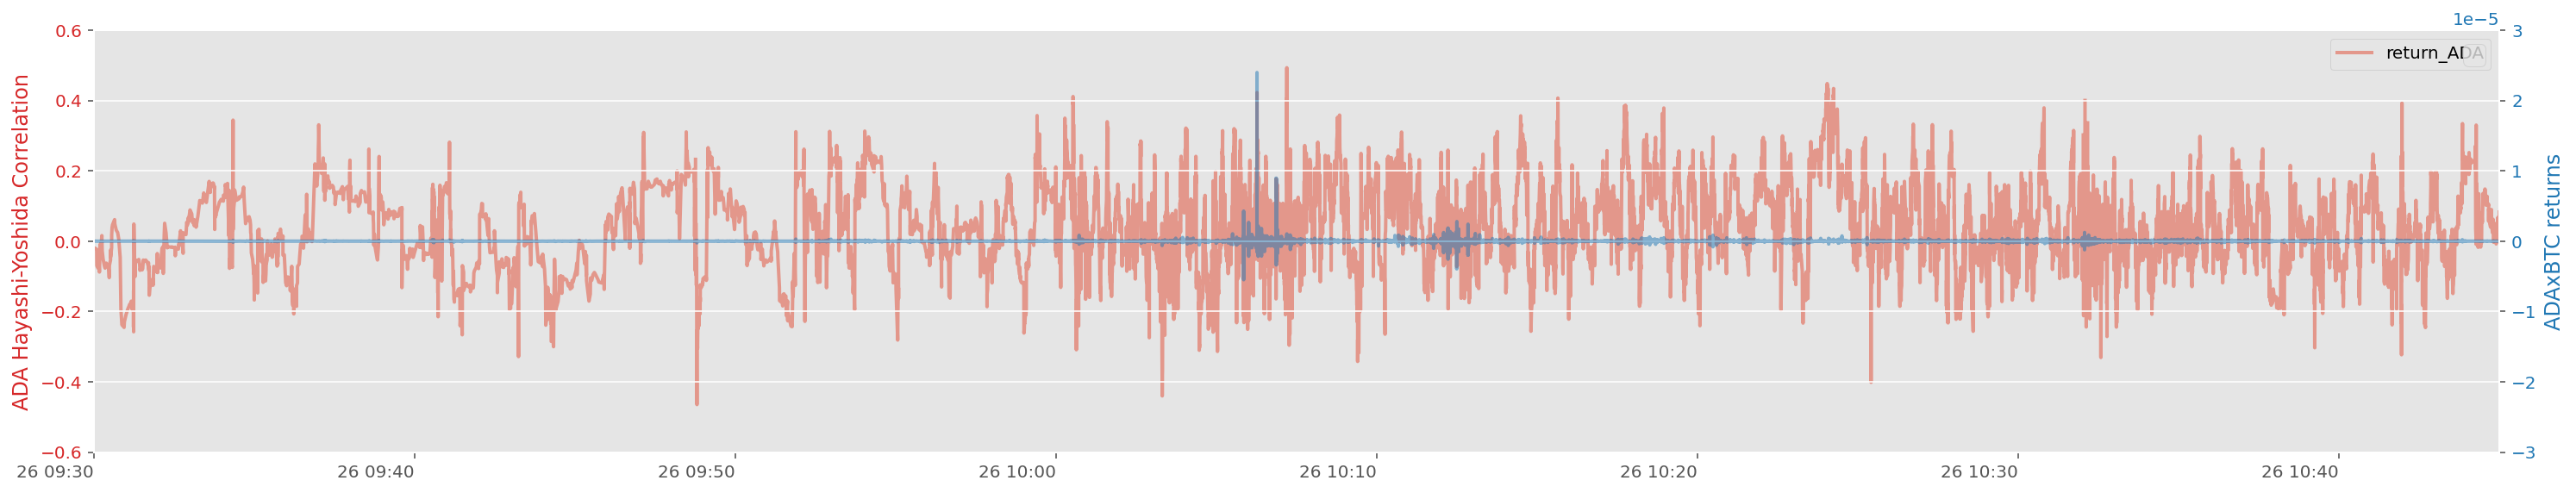

No handles with labels found to put in legend.


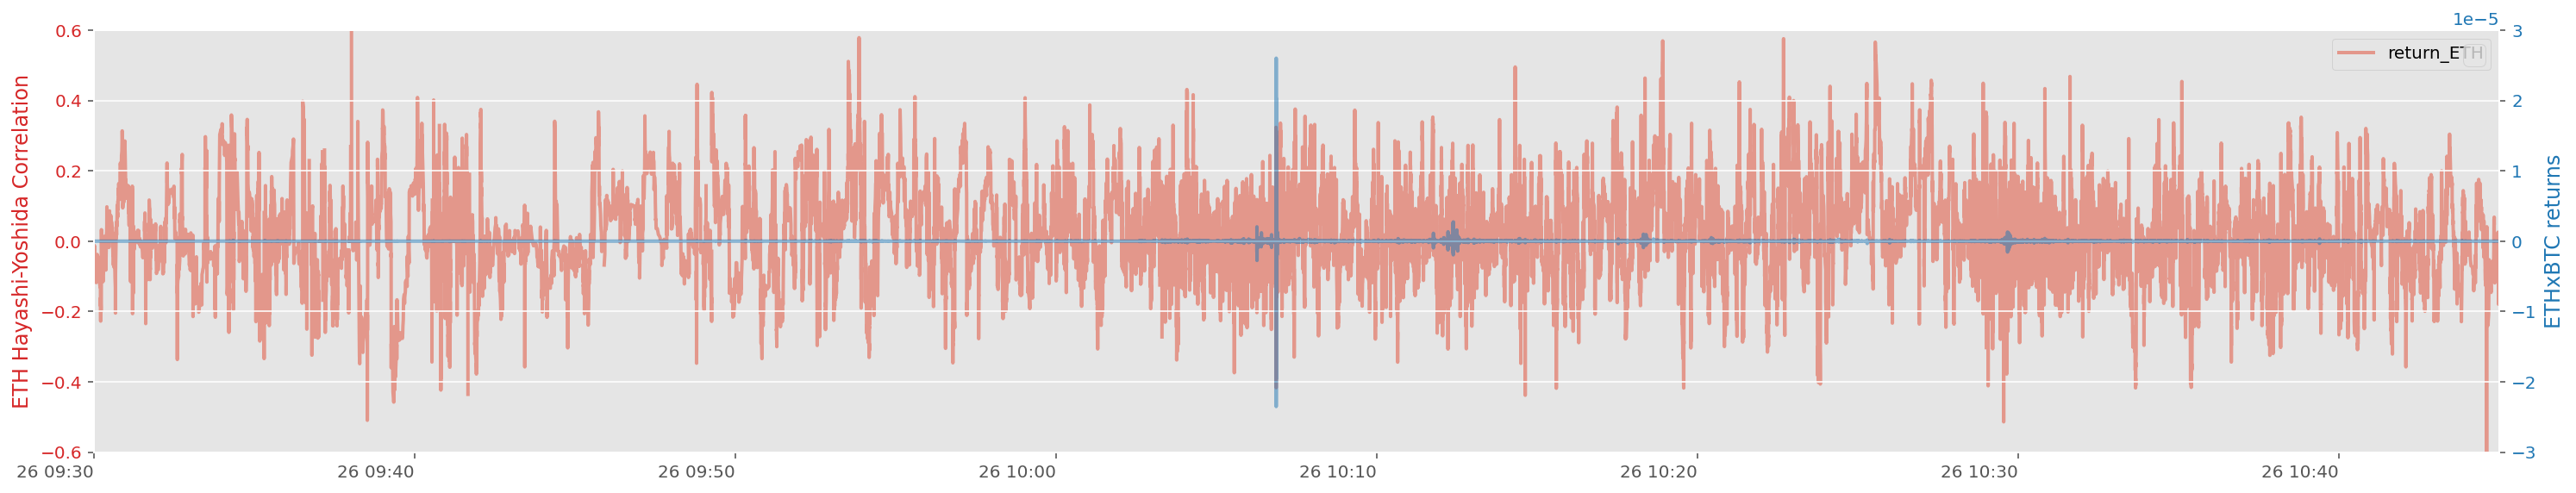

No handles with labels found to put in legend.


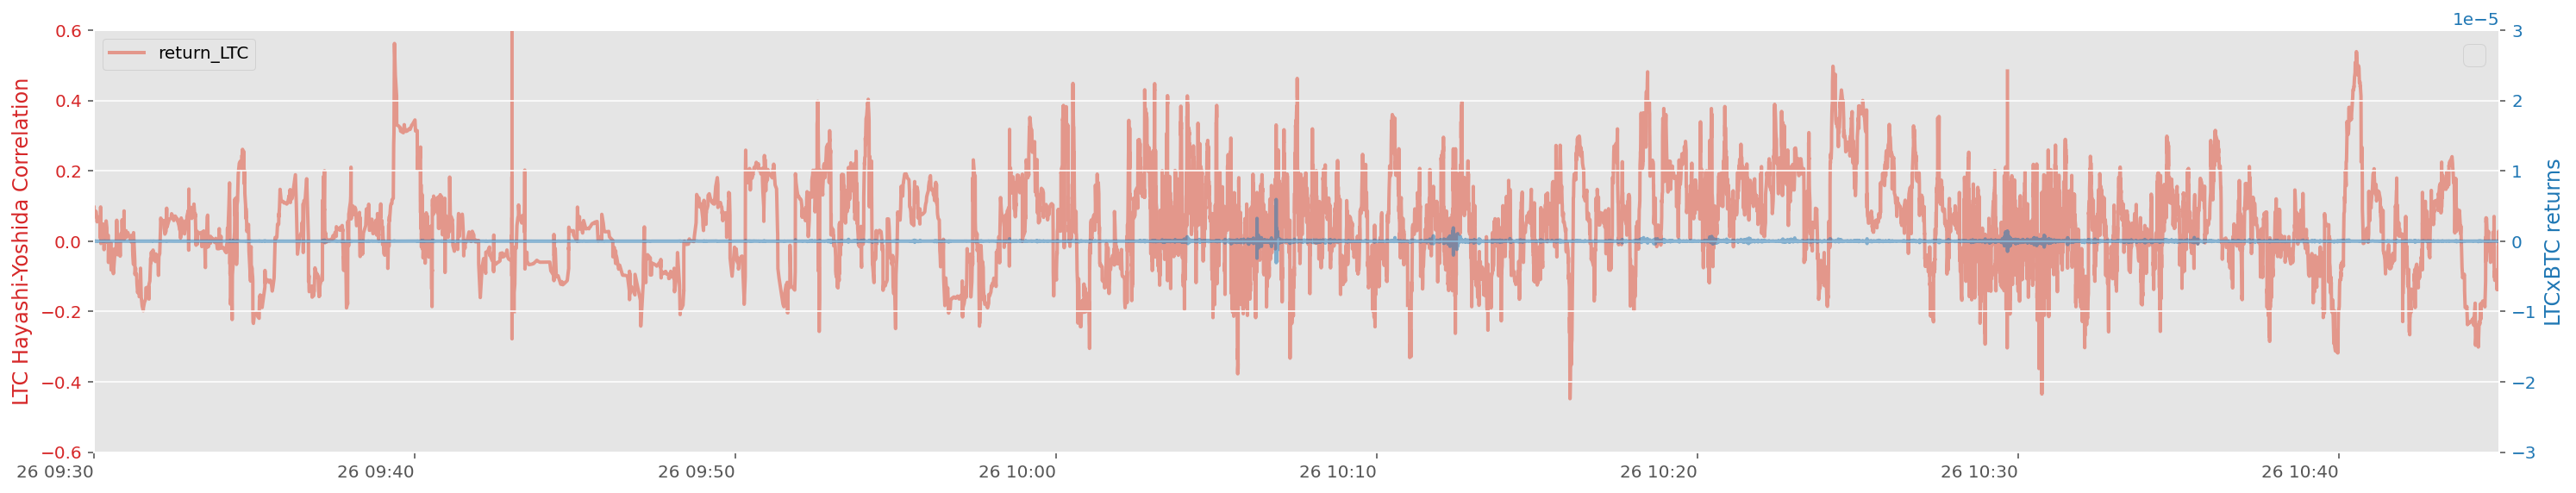

No handles with labels found to put in legend.


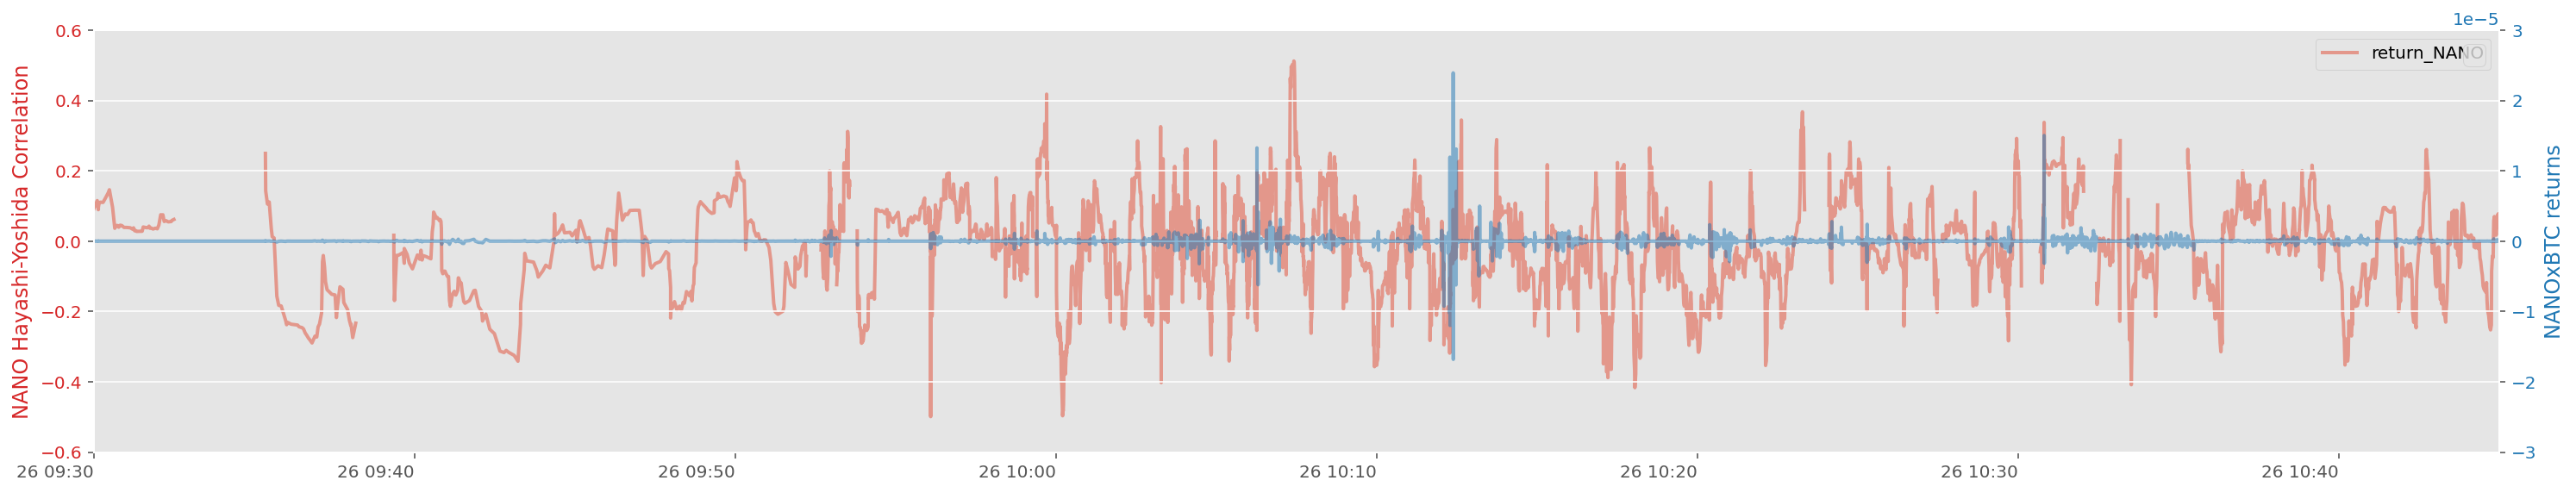

No handles with labels found to put in legend.


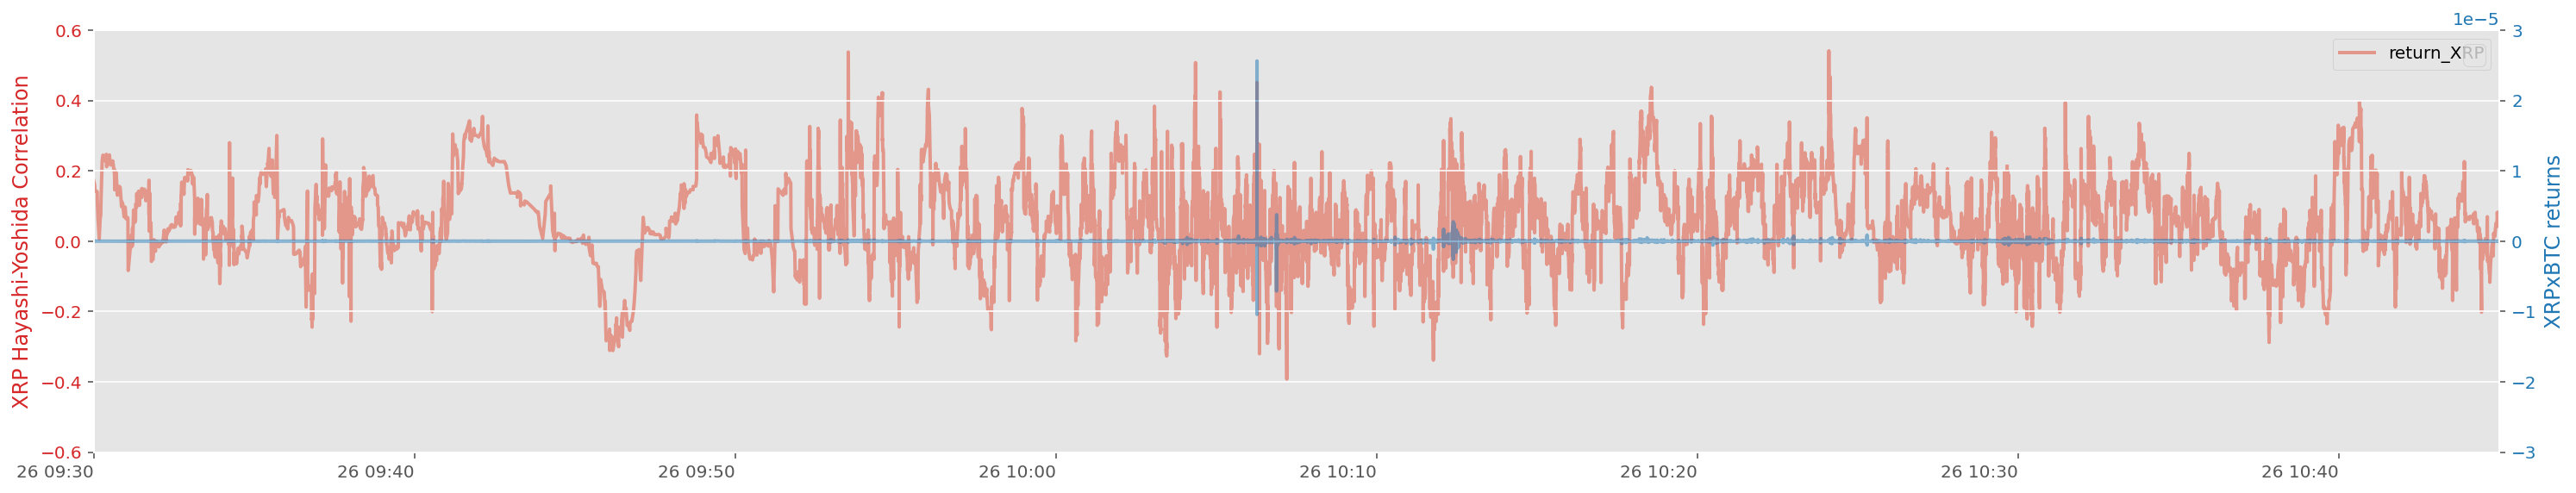

In [291]:
btc = pd.read_parquet('data.nosync/_2020/BTCUSDT.pq')
df_btc = btc.iloc[::20, :]
df_btc['return_BTC'] = df_btc.price.pct_change()
df_btc.drop(columns=['timestamp', 'price'], inplace=True)
#df_btc.drop(columns=['timestamp'], inplace=True)

for symbol in symbols_no_btc:
    symb = symbol[:-4]
    ada = pd.read_parquet('data.nosync/_2020/'+symbol+'.pq')
    if symb != 'NANO':
        #ada = ada.iloc[::5, :]
        a=1
    ada['return_'+symb] = ada.price.pct_change()
    ada.drop(columns=['timestamp', 'price'], inplace=True)
    #ada.drop(columns=['timestamp'], inplace=True)
    
    btc = df_btc[(df_btc.index>=ada.index[0])]  
    MERGE = pd.concat([ada, btc], axis=1)
    MERGE.columns = ['return_'+symb, 'return_BTC']
    MERGE.fillna(method='ffill', inplace=True)
    MERGE.dropna(inplace=True)

    ts_corr = MERGE.rolling(window=50,min_periods=5).corr()
    btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'return_BTC' ].reset_index(level=1, drop=True).drop('return_BTC', axis=1)#.dropna()

    fig, ax1 = plt.subplots()
    
    btc_corr.plot(figsize=(25, 5), linewidth=2, alpha=0.5, rot=0, xlabel='', ax=ax1, label='')
    ax1.set_ylabel(symb+' Hayashi-Yoshida Correlation', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.set_ylim((-0.6, 0.6))
    ax2 = ax1.twinx()
    (MERGE['return_'+symb]*MERGE['return_BTC']).plot(figsize=(25, 5), linewidth=2, alpha=0.5, rot=0, xlabel='', ax=ax2, color='tab:blue', label='')
    ax2.set_ylabel(symb+'xBTC returns', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.set_ylim((-3e-5, 3e-5))
    
    title=symb+' Hayashi-Yoshida Correlation'
    plt.legend(loc=0, prop={'size': 16})
    plt.xlim(left=datetime(2020, 7, 26, 9, 30), right=datetime(2020, 7, 26, 10, 45))
    #plt.xlim(left=datetime(2020, 7, 26, 10, 6, 30), right=datetime(2020, 7, 26, 10, 7))
    ax1.grid(False)
    plt.savefig('images/correlations/'+title+'.png', dpi=300, bbox_inches='tight')
    plt.show()